  # Model Selection and Performance
 



## INTRODUCTION

In this project, i am to builde a predictive model to estimate the production costs of customized metal blocks for a manufacturing company. The company recently underwent a management transition at two of its production facilities, leading to difficulties in accurately estimating production costs. This has resulted in underbidding several recent orders, causing financial losses.

To address this issue, i will perform a comprehensive data analysis and model building exercise using the provided dataset, which includes 198 prior production runs. The dataset contains various characteristics of the production runs, including both numerical and categorical variables.

My goal is to build a regression model that accurately predicts the average cost per block based on the input specifications. We will follow a structured approach, starting with exploratory data analysis to understand the relationships among variables, followed by model building and selection, and finally, model validation and regularization.

# Part A: Exploratory Data Analysis and Model Building

### Part A: Exploratory Data Analysis and Model Building


- Question 1

To start our analysis, we will load the provided dataset and inspect the relationships among the variables using correlation matrices and pair plots. This will help us understand the linear relationships and identify any potential issues such as multicollinearity or outliers.

In [184]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [186]:
# Loading the data from the Excel file
data = pd.read_excel('block_cost.xlsx')

# Display the first few rows of the dataframe
data.head()

,Average Cost,Units,Precision SD,Weight Final,Weight Rem,Stamp Ops,Chisel Ops,Labor Hours,Machine Hours,Cost Metal/Kg,...,1/Units,Breakdown/Unit,Total Metal Cost,Temp Deviation,Detail,Rush,Manager,Music,Shift,Plant
0,34.51,2200,0.5,0.410,1.9246,6,11,0.267,0.033,0.96,...,0.000455,0.007727,2.241216,4.00,DETAIL,NONE,LEE,NONE,DAY,OLD
1,26.09,260,0.1,0.255,0.2810,13,6,0.500,0.017,4.15,...,0.003846,0.011538,2.224400,25.00,DETAIL,NONE,LEE,NONE,DAY,OLD
2,34.84,400,0.1,0.440,1.3296,11,10,0.367,0.033,1.33,...,0.002500,0.010000,2.353568,25.00,DETAIL,NONE,LEE,NONE,DAY,OLD
3,38.73,290,0.1,0.230,0.5320,13,10,0.417,0.033,3.67,...,0.003448,0.010345,2.796540,9.00,DETAIL,NONE,PAT,NONE,DAY,OLD
4,40.36,130,1.0,0.370,0.3124,7,5,0.383,0.017,5.50,...,0.007692,0.000000,3.753200,72.25,NONE,RUSH,LEE,NONE,NIGHT,OLD


In [188]:
#This code will help us have a broad overview and information about the data and the various datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Cost      198 non-null    float64
 1   Units             198 non-null    int64  
 2   Precision SD      198 non-null    float64
 3   Weight Final      198 non-null    float64
 4   Weight Rem        198 non-null    float64
 5   Stamp Ops         198 non-null    int64  
 6   Chisel Ops        198 non-null    int64  
 7   Labor Hours       198 non-null    float64
 8   Machine Hours     198 non-null    float64
 9   Cost Metal/Kg     198 non-null    float64
 10  Room Temp         198 non-null    float64
 11  Breakdowns        198 non-null    int64  
 12  1/Units           198 non-null    float64
 13  Breakdown/Unit    198 non-null    float64
 14  Total Metal Cost  198 non-null    float64
 15  Temp Deviation    198 non-null    float64
 16  Detail            198 non-null    object 
 1

We notice that there are 16 numeric columns (4 are int64 and 12 are float64) in addition to 6 categorical columns (objects)

We will then use the correlation matrix and pair plots to provide insights into the relationships amonth the variables. However since the algorithem only works with numeric data, we will identify only the numeric columns and perform the correlation on them. The next code does this.

In [191]:
# numerical columns
numerical_vars = [
    'Average Cost', 'Units', 'Precision SD', 'Weight Final', 'Weight Rem',
    'Stamp Ops', 'Chisel Ops', 'Labor Hours', 'Machine Hours', 'Cost Metal/Kg',
    'Room Temp', 'Breakdowns', '1/Units', 'Breakdown/Unit', 'Temp Deviation', 'Total Metal Cost'
]

# Computing the correlation matrix
correlation_matrix = data[numerical_vars].corr().round(2)

# Displaying the correlation matrix in table form
correlation_matrix

,Average Cost,Units,Precision SD,Weight Final,Weight Rem,Stamp Ops,Chisel Ops,Labor Hours,Machine Hours,Cost Metal/Kg,Room Temp,Breakdowns,1/Units,Breakdown/Unit,Temp Deviation,Total Metal Cost
Average Cost,1.00,-0.29,-0.01,-0.01,0.07,0.27,0.23,0.54,0.19,0.18,0.06,-0.11,0.47,0.14,0.22,0.30
Units,-0.29,1.00,0.03,-0.00,-0.06,-0.12,-0.09,-0.48,-0.05,0.06,0.02,0.65,-0.55,0.03,-0.08,0.10
Precision SD,-0.01,0.03,1.00,0.01,0.01,0.04,0.05,-0.10,0.04,0.03,-0.07,0.13,0.07,0.08,0.11,0.07
Weight Final,-0.01,-0.00,0.01,1.00,0.60,-0.04,0.13,0.07,0.13,-0.55,0.01,0.03,0.07,-0.01,0.02,-0.11
Weight Rem,0.07,-0.06,0.01,0.60,1.00,0.40,0.70,0.24,0.52,-0.59,-0.02,0.02,0.06,0.04,0.03,0.07
Stamp Ops,0.27,-0.12,0.04,-0.04,0.40,1.00,0.77,0.42,0.58,0.10,-0.03,-0.04,0.06,0.06,0.04,0.43
Chisel Ops,0.23,-0.09,0.05,0.13,0.70,0.77,1.00,0.33,0.72,-0.21,0.02,0.01,0.04,0.11,0.03,0.34
Labor Hours,0.54,-0.48,-0.10,0.07,0.24,0.42,0.33,1.00,0.28,-0.05,-0.11,-0.36,0.83,-0.10,0.10,0.10
Machine Hours,0.19,-0.05,0.04,0.13,0.52,0.58,0.72,0.28,1.00,-0.15,0.01,0.20,0.02,0.33,0.23,0.26
Cost Metal/Kg,0.18,0.06,0.03,-0.55,-0.59,0.10,-0.21,-0.05,-0.15,1.00,0.03,0.07,-0.07,0.04,0.01,0.69


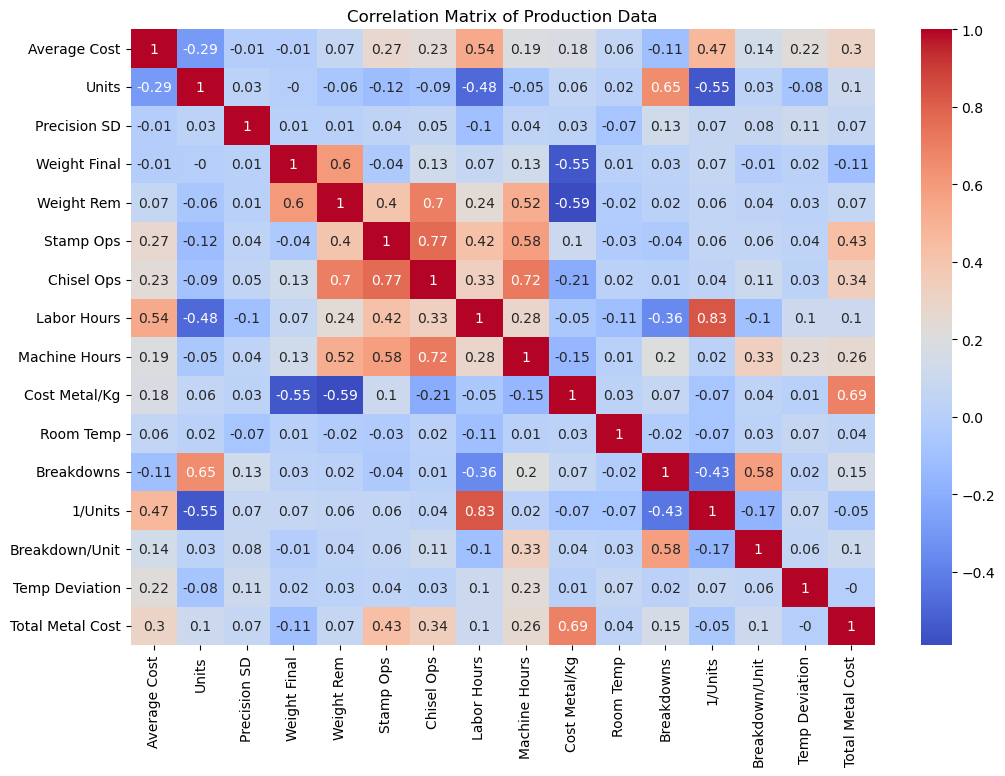

In [193]:
# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Production Data')
plt.show()

### Key Insights from the correlation matrix:

- Strong Correlations:

Labor Hours and Average Cost: There is a strong positive correlation (0.54) between Labor Hours and Average Cost. This suggests that as labor hours increase, the average cost per block also increases.

Stamp Ops and Chisel Ops: These two variables have a very high positive correlation (0.77). This indicates that they often increase together, which could imply that blocks requiring more stamping operations also require more chiseling operations.

Machine Hours and other operations: Machine Hours is strongly correlated with Chisel Ops (0.72) and Stamp Ops (0.52). This suggests that higher machine hours are associated with higher numbers of chiseling and stamping operations.

Cost Metal/Kg and Weight Rem: There is a significant negative correlation (-0.59) between Cost Metal/Kg and Weight Rem. This suggests that higher costs per kilogram of metal are associated with lower weight removed during production.

Total Metal Cost and Cost Metal/Kg: Total Metal Cost is highly correlated with Cost Metal/Kg (0.69), as expected since total metal cost is derived from the cost of metal per kilogram.

- Multicollinearity Issues:

Stamp Ops, Chisel Ops, and Machine Hours: The strong correlations among these variables suggest multicollinearity, which can pose issues in regression modeling. Multicollinearity can make it difficult to determine the individual effect of each variable on the response variable (Average Cost).

- Weak Correlations:

Units and Average Cost: There is a negative correlation (-0.29) between Units and Average Cost. This implies that larger production runs tend to have lower average costs, which is consistent with economies of scale.
Room Temp and other variables: Room Temp shows weak correlations with most variables, suggesting that temperature does not significantly affect the other production variables.

- Fixed Costs Indicator:

1/Units and Average Cost: There is a notable positive correlation (0.47) between 1/Units and Average Cost. This supports the idea that 1/Units captures fixed costs not accounted for by other variables.

- Breakdowns and Average Cost:

Breakdowns and Units: Breakdowns are positively correlated with Units (0.65), indicating that more production runs have more breakdowns.
Breakdown/Unit and Average Cost: There is a positive correlation (0.14) between Breakdown/Unit and Average Cost, suggesting that higher breakdowns per unit increase the average cost.

### Recommendations (What should be done ?)

- Address Multicollinearity:

Consider techniques such as Principal Component Analysis (PCA) or Variance Inflation Factor (VIF) analysis to address multicollinearity among highly correlated variables like Stamp Ops, Chisel Ops, and Machine Hours.

- Variable Selection:

Focus on variables with strong correlations to Average Cost for initial model building. Variables like Labor Hours, 1/Units, and Stamp Ops are good candidates.
Be cautious with variables showing weak correlations, as they might not contribute significantly to the predictive power of the model.

- Further Analysis:

Explore potential interactions between variables that are highly correlated with each other and the response variable.
Investigate non-linear relationships and potential transformations for variables with weak or unclear correlations.

### For instance when it comes to Variable Selection, below are the pairs of columns that have high correlation.

In [87]:
# Columns with stron correlation
correlation_pairs = []

# Iterate over the correlation matrix and extract pairs with |r| > 0.3
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            correlation_pairs.append((col1, col2, corr_value))

# Convert the list of tuples into a DataFrame
correlation_df = pd.DataFrame(correlation_pairs, columns=['Column 1', 'Column 2', 'Correlation'])

# Sort the DataFrame by absolute correlation values in descending order
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False).reset_index()

# Display the DataFrame
correlation_df

,index,Column 1,Column 2,Correlation
0,11,1/Units,Labor Hours,0.83
1,2,Chisel Ops,Stamp Ops,0.77
2,6,Machine Hours,Chisel Ops,0.72
3,1,Chisel Ops,Weight Rem,0.70
4,13,Total Metal Cost,Cost Metal/Kg,0.69
5,9,Breakdowns,Units,0.65
6,0,Weight Rem,Weight Final,0.60
7,5,Machine Hours,Stamp Ops,0.58
8,12,Breakdown/Unit,Breakdowns,0.58
9,3,Labor Hours,Average Cost,0.54


### Part A: Exploratory Data Analysis and Model Building .. Cont..


- Question 2

Now, Let's generate the scatter plot for Average Cost and Labor Hours and analyze the presence of outliers. We will then observe the plot and discuss the consequences of including these outliers in the regression model and decide on the next steps for handling them

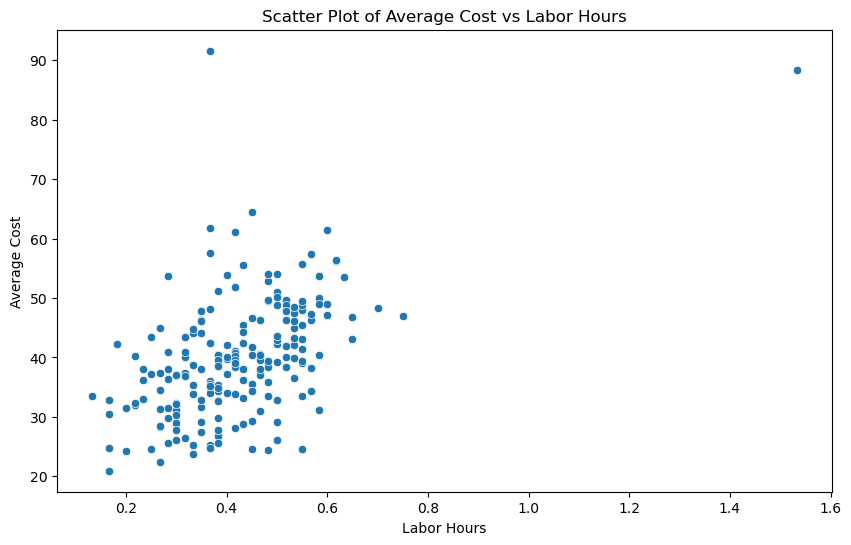

In [196]:
# Generate a scatter plot for Average Cost and Labor Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labor Hours', y='Average Cost', data=data)
plt.title('Scatter Plot of Average Cost vs Labor Hours')
plt.xlabel('Labor Hours')
plt.ylabel('Average Cost')
plt.show()

In [198]:
# Identifying potential outliers using z-scores
# Calculating z-scores for Average Cost and Labor Hours
data_copy = data.copy()
data_copy['z_score_avg_cost'] = stats.zscore(data_copy['Average Cost'])
data_copy['z_score_labor_hours'] = stats.zscore(data_copy['Labor Hours'])

# Defining threshold for outliers using 3 standard deviations of the mean which is a balance between too strict and too lenient
outliers = data_copy[(abs(data_copy['z_score_avg_cost']) > 3) | (abs(data_copy['z_score_labor_hours']) > 3)]

# Displaying potential outliers in table form
print("Potential outliers:")
print(outliers[['Average Cost', 'Labor Hours', 'z_score_avg_cost', 'z_score_labor_hours']])

Potential outliers:
    Average Cost  Labor Hours  z_score_avg_cost  z_score_labor_hours
18         91.60        0.367          5.051818            -0.387480
93         88.28        1.533          4.726599             7.832375


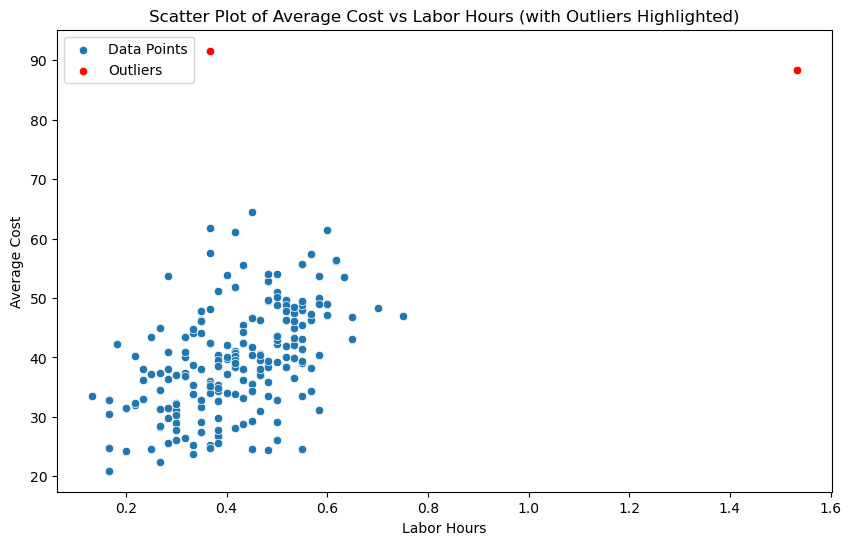

In [162]:
# Highlighting the outliers on the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labor Hours', y='Average Cost', data=data, label='Data Points')
sns.scatterplot(x=outliers['Labor Hours'], y=outliers['Average Cost'], color='red', label='Outliers')
plt.title('Scatter Plot of Average Cost vs Labor Hours (with Outliers Highlighted)')
plt.xlabel('Labor Hours')
plt.ylabel('Average Cost')
plt.legend()
plt.show()

#### Based on the scatter plot, it appears that there are a couple of noticeable outliers. Specifically, there are points with high values for Average Cost and Labor Hours that are far removed from the main cluster of data points.

Identifying Outliers

- Labor Hours Outlier: There is a point at around 1.5 Labor Hours with a high Average Cost.
- Average Cost Outlier: There is another point with an Average Cost around 90, which is significantly higher than the other points.


#### Consequences of Including Outliers in Regression

Including these outliers in the regression model can have several consequences:

- Influence on Model Coefficients: Outliers can disproportionately influence the coefficients of the regression model, making the model fit these extreme points rather than the general trend of the data.

- Increased Error: The presence of outliers can increase the mean squared error (MSE) of the model, reducing its overall predictive accuracy.

- Bias: The regression line might be skewed, leading to biased predictions for the majority of the data points that fall within the normal range.

### Which of the interpretation shalll we keep ????????? UP/DOWN

i. Are there noticeable outliers?
Answer: Yes there are potential outliers as shown in the graph and the table above

ii. If yes to (i), what would be the consequence of a regression built with these outliers included?

Answer:
Including outliers in regression models can have several significant consequences. Outliers can disproportionately influence the slope and intercept of the regression line, leading to biased estimates of the coefficients. This means the model may not accurately reflect the true relationship between the variables. Outliers can also increase the variance of the residuals, which in turn increases the standard errors of the estimated coefficients, making the coefficient estimates less precise and widening the confidence intervals.

Moreover, a model with outliers might perform well on the training data but poorly on new, unseen data. This happens because the model might overfit the outliers, capturing noise rather than the underlying trend. Including outliers can inflate or deflate the R-squared and adjusted R-squared values, leading to a misleading evaluation of the model's explanatory power. Outliers can violate key assumptions of linear regression, such as linearity, homoscedasticity (constant variance of errors), and normality of residuals, which compromises hypothesis tests and confidence intervals. Additionally, outliers can affect hypothesis tests by increasing the likelihood of Type I or Type II errors, leading to incorrect conclusions about the statistical significance of the predictors.

### Part A: Exploratory Data Analysis and Model Building .. Cont..


- Question 3

Next, we will generate a scatterplot and correlation matrix for the following variables: Average Cost, Labor Hours, Machine Hours, Stamp Ops, Chisel Ops, Weight Rem. 

We will then observe to understand in particular,the relations between the response and an explanatory variable, and between explanatory variables.

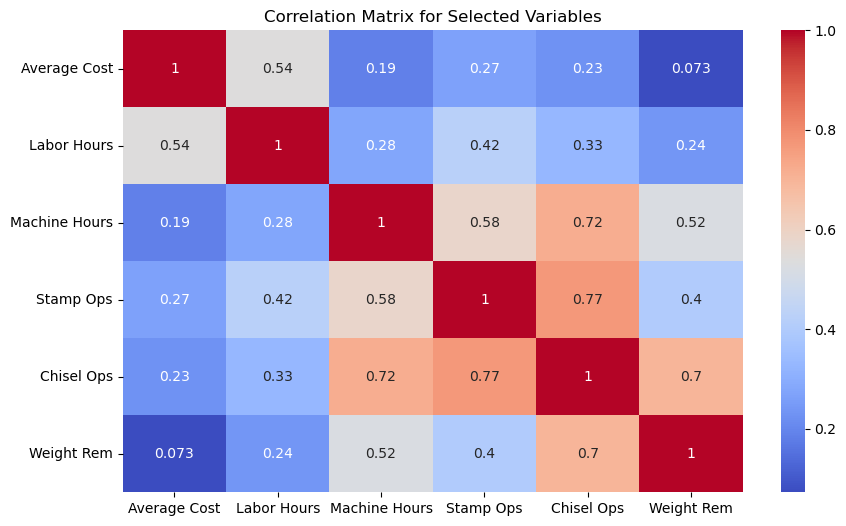

In [204]:
# Select the relevant subset of data
subset = data[['Average Cost', 'Labor Hours', 'Machine Hours', 'Stamp Ops', 'Chisel Ops', 'Weight Rem']]

# Generate a correlation matrix
corr_matrix_subset = subset.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Variables')
plt.show()


### What do we observe generally from the Correlation Matrix 

The correlation matrix reveals several key relationships among the variables. Notably, Labor Hours shows a strong positive correlation (0.54) with Average Cost, indicating that higher labor hours are associated with higher production costs. Stamp Ops and Chisel Ops also have positive correlations with Average Cost (0.27 and 0.23, respectively), but these relationships are weaker. Strong correlations between explanatory variables, such as between Stamp Ops and Chisel Ops (0.77) and between Machine Hours and both Stamp Ops (0.58) and Chisel Ops (0.72), suggest potential multicollinearity issues. These insights suggest focusing on significant predictors like Labor Hours while addressing multicollinearity among the explanatory variables.


/Users/ekow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


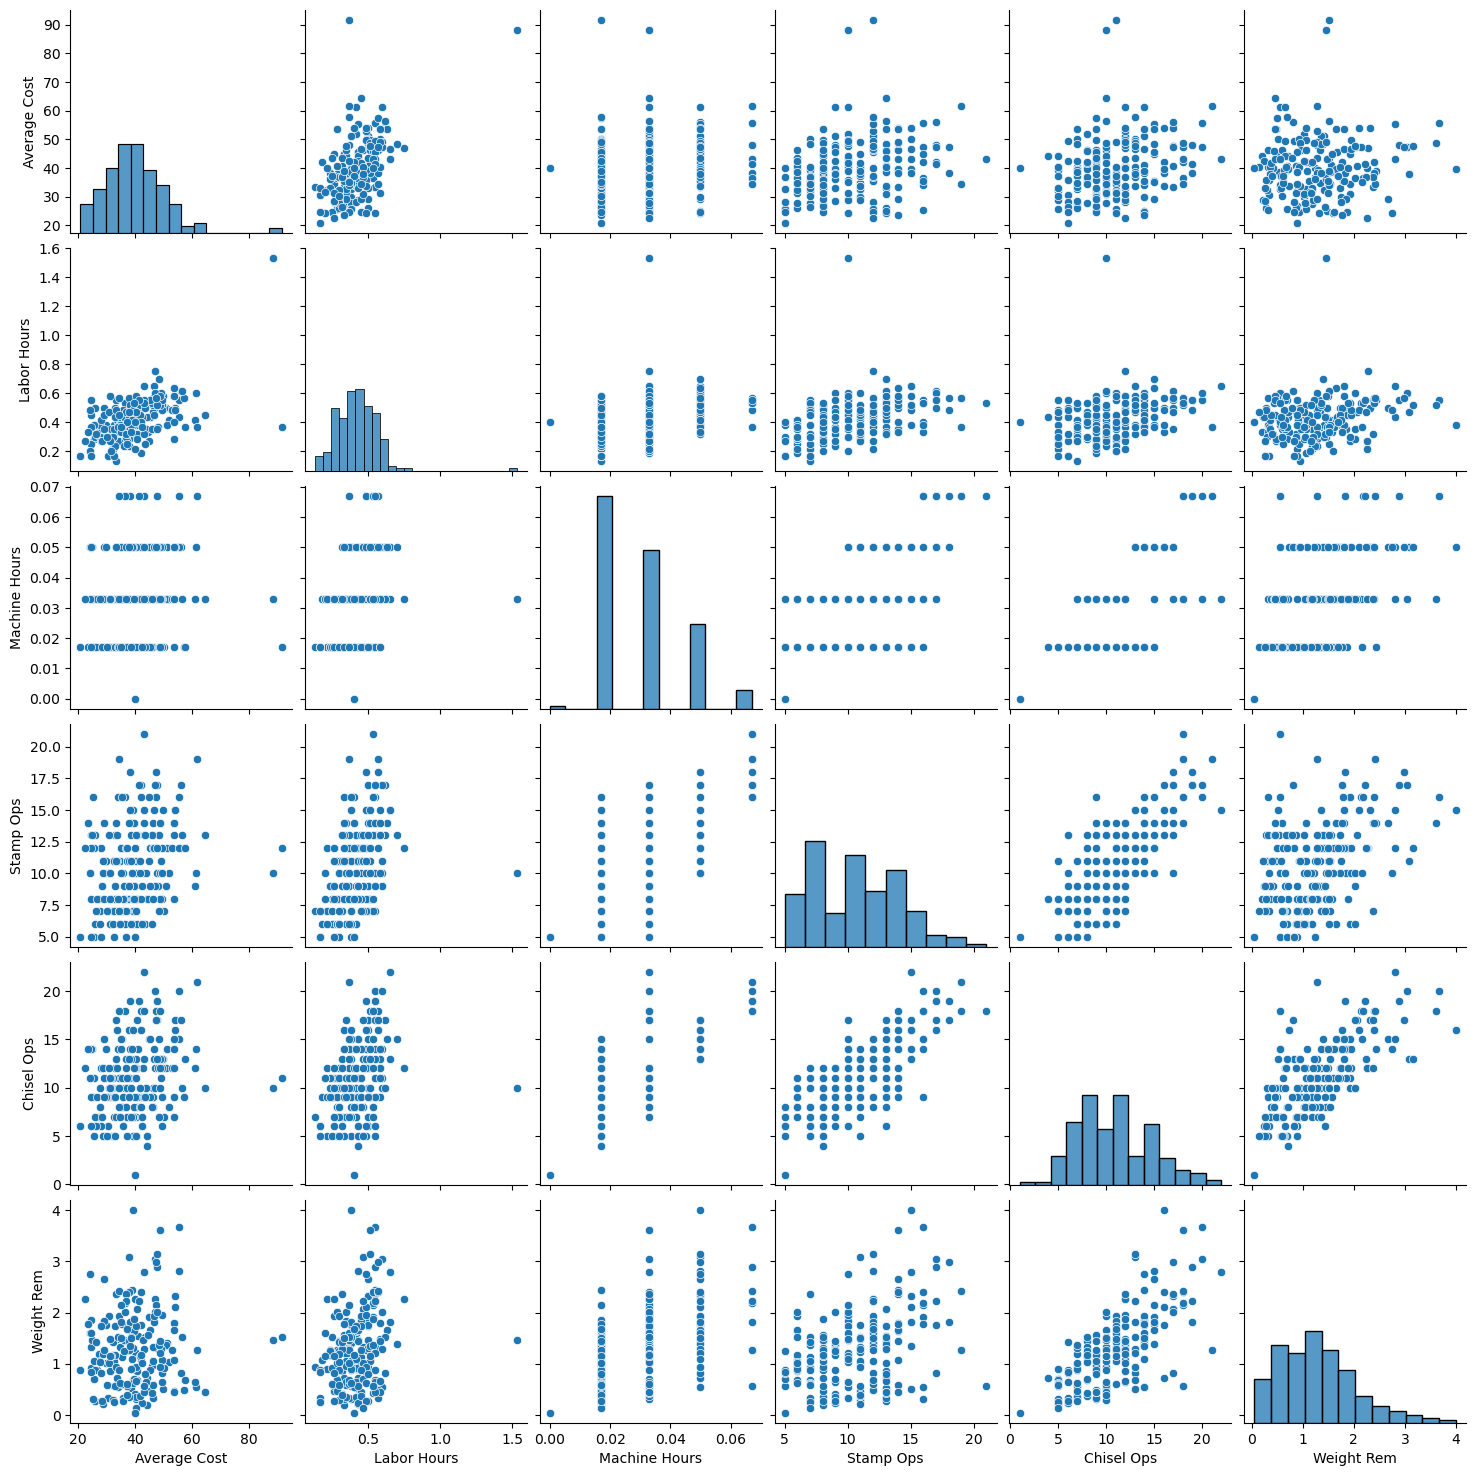

In [206]:
# Generate pair plots for the selected subset of variables to visualize relationships
sns.pairplot(subset)
plt.show()

### What do we observe generally from the  pair plot

The pair plots provide visual confirmation of the relationships identified in the correlation matrix. The plot of Average Cost versus Labor Hours highlights a clear positive relationship, with higher labor hours generally leading to higher average costs. Scatter plots of Average Cost against Machine Hours, Stamp Ops, Chisel Ops, and Weight Rem show weaker relationships, consistent with the correlation matrix. Additionally, the strong relationships between Stamp Ops, Chisel Ops, and Machine Hours are evident, reinforcing the multicollinearity concerns. These plots suggest that Labor Hours is a key predictor of Average Cost, while the interrelationships among other explanatory variables need careful consideration in model building.

### Specifically, below are some observations about the relationship between response and Explanatory variables as well as between Explanatory variables

- Relation Between Response and Explanatory Variables:

Labor Hours has the strongest positive relationship with Average Cost, indicating that it is a significant predictor of the cost per block. Stamp Ops and Chisel Ops also show positive correlations with Average Cost, but these relationships are weaker compared to Labor Hours.

- Relation Between Explanatory Variables:

Strong correlations between Stamp Ops, Chisel Ops, and Machine Hours suggest multicollinearity, which could affect the stability and interpretation of regression coefficients. Multicollinearity might necessitate the use of techniques such as Principal Component Analysis (PCA) or regularization methods (Ridge or Lasso regression) to mitigate its effects.

### Part A: Exploratory Data Analysis and Model Building .. Cont..


- Question 4

We will now go ahead to Fit the Regression Model, produce and discuss a summary table of the regression output. We will then check if there is enough justification to conclude that the model is worth examining based on the residuals from a theory point of view. We will go through the following steps 

- Remove outliers identified in previous exercise where we identified two data points which were outliers 
- Remove Plant from the list of explanatory variables. This is because it represents a fixed effect related to the location of production. Including this variable may introduce multicollinearity, as other variables such as Labor Hours, Machine Hours, and Breakdowns can capture location-specific effects indirectly.
- Convert categorical variables to dummy variables, setting Terry as baseline for Manager
- Fit the regression model 
- Produce the regression output and analyse the residuals

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Cost      198 non-null    float64
 1   Units             198 non-null    int64  
 2   Precision SD      198 non-null    float64
 3   Weight Final      198 non-null    float64
 4   Weight Rem        198 non-null    float64
 5   Stamp Ops         198 non-null    int64  
 6   Chisel Ops        198 non-null    int64  
 7   Labor Hours       198 non-null    float64
 8   Machine Hours     198 non-null    float64
 9   Cost Metal/Kg     198 non-null    float64
 10  Room Temp         198 non-null    float64
 11  Breakdowns        198 non-null    int64  
 12  1/Units           198 non-null    float64
 13  Breakdown/Unit    198 non-null    float64
 14  Total Metal Cost  198 non-null    float64
 15  Temp Deviation    198 non-null    float64
 16  Detail            198 non-null    object 
 1

### Step 1-3: Remove Outliers and Plant Variable, Set Baseline for Manager

In [425]:
# Identify and remove outliers based on z-scores
z_scores = np.abs(stats.zscore(data[['Average Cost', 'Labor Hours']]))
threshold = 3
data_no_outliers = data[(z_scores < threshold).all(axis=1)]
data_no_outliers

,Average Cost,Units,Precision SD,Weight Final,Weight Rem,Stamp Ops,Chisel Ops,Labor Hours,Machine Hours,Cost Metal/Kg,...,1/Units,Breakdown/Unit,Total Metal Cost,Temp Deviation,Detail,Rush,Manager,Music,Shift,Plant
0,34.51,2200,0.5,0.410,1.9246,6,11,0.267,0.033,0.96,...,0.000455,0.007727,2.241216,4.00,DETAIL,NONE,LEE,NONE,DAY,OLD
1,26.09,260,0.1,0.255,0.2810,13,6,0.500,0.017,4.15,...,0.003846,0.011538,2.224400,25.00,DETAIL,NONE,LEE,NONE,DAY,OLD
2,34.84,400,0.1,0.440,1.3296,11,10,0.367,0.033,1.33,...,0.002500,0.010000,2.353568,25.00,DETAIL,NONE,LEE,NONE,DAY,OLD
3,38.73,290,0.1,0.230,0.5320,13,10,0.417,0.033,3.67,...,0.003448,0.010345,2.796540,9.00,DETAIL,NONE,PAT,NONE,DAY,OLD
4,40.36,130,1.0,0.370,0.3124,7,5,0.383,0.017,5.50,...,0.007692,0.000000,3.753200,72.25,NONE,RUSH,LEE,NONE,NIGHT,OLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,48.97,110,0.1,0.400,1.4467,14,12,0.583,0.017,1.04,...,0.009091,0.009091,1.920568,0.25,DETAIL,NONE,TERRY,POP,DAY,NEW
194,42.47,130,0.5,0.410,1.0159,6,7,0.367,0.017,0.90,...,0.007692,0.000000,1.283310,324.00,NONE,RUSH,RANDY,NONE,DAY,OLD
195,41.40,180,0.1,0.395,2.2230,17,19,0.550,0.067,1.24,...,0.005556,0.000000,3.246320,25.00,DETAIL,NONE,LEE,NONE,DAY,OLD
196,39.86,100,0.1,0.320,1.8779,8,12,0.533,0.033,1.44,...,0.010000,0.000000,3.164976,9.00,DETAIL,NONE,LEE,NONE,DAY,OLD


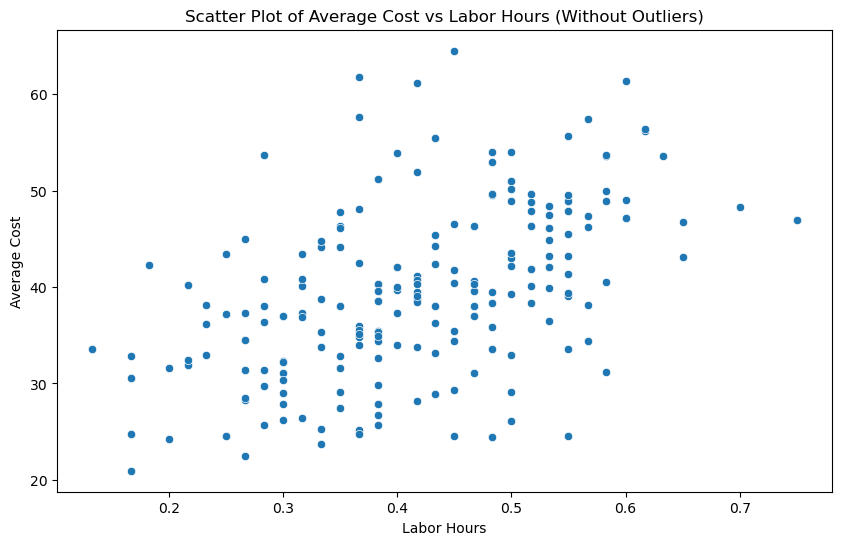

In [411]:
# Generate a scatter plot for Average Cost and Labor Hours without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labor Hours', y='Average Cost', data=data_no_outliers)
plt.title('Scatter Plot of Average Cost vs Labor Hours (Without Outliers)')
plt.xlabel('Labor Hours')
plt.ylabel('Average Cost')
plt.show()

In [419]:
# Remove 'Plant' variable
data_without_plant = data_no_outliers.drop(columns=['Plant'])

# Setting 'Terry' as the baseline manager
data_terry_baseline = pd.get_dummies(data_without_plant, columns=['Manager'])

# Manually drop the 'Manager_TERRY' column
data_modified = data_terry_baseline.drop(columns=['Manager_TERRY'])

data_modified.head()

,Average Cost,Units,Precision SD,Weight Final,Weight Rem,Stamp Ops,Chisel Ops,Labor Hours,Machine Hours,Cost Metal/Kg,...,Total Metal Cost,Temp Deviation,Detail,Rush,Music,Shift,Manager_JEAN,Manager_LEE,Manager_PAT,Manager_RANDY
0,34.51,2200,0.5,0.410,1.9246,6,11,0.267,0.033,0.96,...,2.241216,4.00,DETAIL,NONE,NONE,DAY,False,True,False,False
1,26.09,260,0.1,0.255,0.2810,13,6,0.500,0.017,4.15,...,2.224400,25.00,DETAIL,NONE,NONE,DAY,False,True,False,False
2,34.84,400,0.1,0.440,1.3296,11,10,0.367,0.033,1.33,...,2.353568,25.00,DETAIL,NONE,NONE,DAY,False,True,False,False
3,38.73,290,0.1,0.230,0.5320,13,10,0.417,0.033,3.67,...,2.796540,9.00,DETAIL,NONE,NONE,DAY,False,False,True,False
4,40.36,130,1.0,0.370,0.3124,7,5,0.383,0.017,5.50,...,3.753200,72.25,NONE,RUSH,NONE,NIGHT,False,True,False,False


### Step 4: Fit the Linear Regression Model

In [427]:
# Convert categorical variables to dummy variables
categorical_vars = ['Detail','Rush', 'Music', 'Shift']
clean_data = pd.get_dummies(data_modified, columns=categorical_vars, drop_first=True)

# Ensure data is numeric: converting bools to integer
clean_data = clean_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Ensure there are no missing values
clean_data = clean_data.dropna()

# Prepare the data for regression
X = clean_data.drop(columns=['Average Cost'])
y = clean_data['Average Cost']

X = sm.add_constant(X)

In [429]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 197
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             196 non-null    float64
 1   Units             196 non-null    int64  
 2   Precision SD      196 non-null    float64
 3   Weight Final      196 non-null    float64
 4   Weight Rem        196 non-null    float64
 5   Stamp Ops         196 non-null    int64  
 6   Chisel Ops        196 non-null    int64  
 7   Labor Hours       196 non-null    float64
 8   Machine Hours     196 non-null    float64
 9   Cost Metal/Kg     196 non-null    float64
 10  Room Temp         196 non-null    float64
 11  Breakdowns        196 non-null    int64  
 12  1/Units           196 non-null    float64
 13  Breakdown/Unit    196 non-null    float64
 14  Total Metal Cost  196 non-null    float64
 15  Temp Deviation    196 non-null    float64
 16  Manager_JEAN      196 non-null    int64  
 17  Ma

In [435]:
data_reg = X.copy(deep=True)
data_reg.head()

,const,Units,Precision SD,Weight Final,Weight Rem,Stamp Ops,Chisel Ops,Labor Hours,Machine Hours,Cost Metal/Kg,...,Manager_JEAN,Manager_LEE,Manager_PAT,Manager_RANDY,Detail_NONE,Rush_RUSH,Music_NONE,Music_POP,Music_ROCK,Shift_NIGHT
0,1.0,2200,0.5,0.410,1.9246,6,11,0.267,0.033,0.96,...,0,1,0,0,0,0,1,0,0,0
1,1.0,260,0.1,0.255,0.2810,13,6,0.500,0.017,4.15,...,0,1,0,0,0,0,1,0,0,0
2,1.0,400,0.1,0.440,1.3296,11,10,0.367,0.033,1.33,...,0,1,0,0,0,0,1,0,0,0
3,1.0,290,0.1,0.230,0.5320,13,10,0.417,0.033,3.67,...,0,0,1,0,0,0,1,0,0,0
4,1.0,130,1.0,0.370,0.3124,7,5,0.383,0.017,5.50,...,0,1,0,0,1,1,1,0,0,1


In [437]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 197
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             196 non-null    float64
 1   Units             196 non-null    int64  
 2   Precision SD      196 non-null    float64
 3   Weight Final      196 non-null    float64
 4   Weight Rem        196 non-null    float64
 5   Stamp Ops         196 non-null    int64  
 6   Chisel Ops        196 non-null    int64  
 7   Labor Hours       196 non-null    float64
 8   Machine Hours     196 non-null    float64
 9   Cost Metal/Kg     196 non-null    float64
 10  Room Temp         196 non-null    float64
 11  Breakdowns        196 non-null    int64  
 12  1/Units           196 non-null    float64
 13  Breakdown/Unit    196 non-null    float64
 14  Total Metal Cost  196 non-null    float64
 15  Temp Deviation    196 non-null    float64
 16  Manager_JEAN      196 non-null    int64  
 17  Ma

In [441]:
# Fit the Linear Regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Display the model summary
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:           Average Cost   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     7.561
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           4.54e-17
Time:                        19:22:25   Log-Likelihood:                -633.76
No. Observations:                 196   AIC:                             1320.
Df Residuals:                     170   BIC:                             1405.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.5285      8.135  

### Step 5: Anlysing the results

<Figure size 1000x600 with 0 Axes>

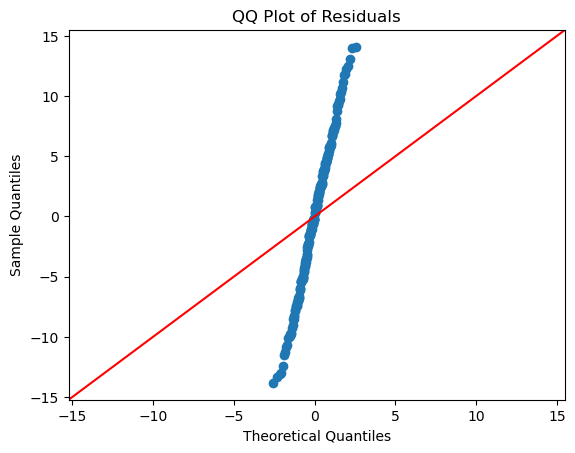

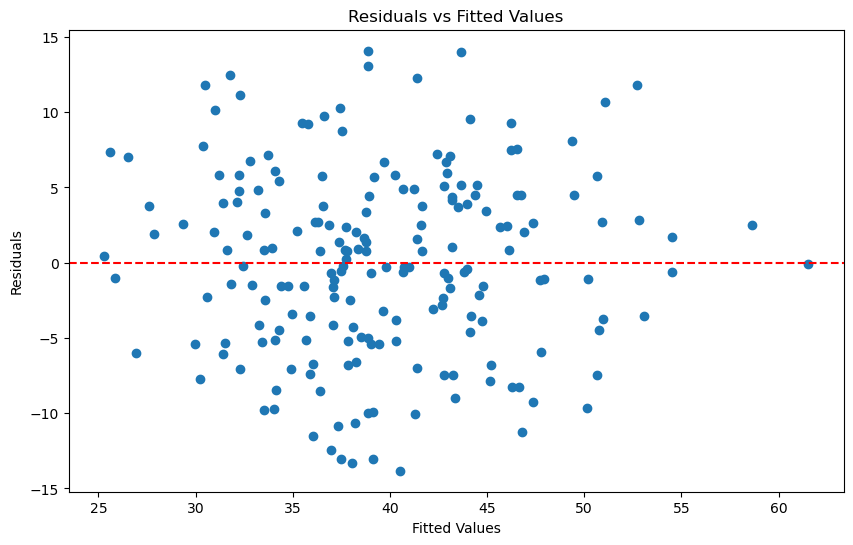

In [443]:
# Import necessary library for residual plots
import statsmodels.api as sm

# Plot residuals
plt.figure(figsize=(10, 6))
sm.qqplot(model.resid, line ='45')
plt.title('QQ Plot of Residuals')
plt.show()

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Summary Table of Regression Output

R-squared and Adjusted R-squared:
- R-squared: 0.526 (52.6%)
- Adjusted R-squared: 0.457 (45.7%)

These values indicate that the model explains approximately 52.6% of the variability in the Average Cost. Although this is a moderate level of explanation, it is far less than the previous result, which suggests that the model might be more realistic without overfitting.

- Coefficients and P-values:

The coefficients represent the change in Average Cost for a one-unit change in the predictor variable, holding all other variables constant. Some predictors have significant p-values indicating statistical significance at conventional levels (e.g., 0.05).

### Detailed Analysis of Significant Variables

Significant Predictors:

- Labor Hours: The coefficient for Labor Hours is 25.3749 with a p-value of 0.009, indicating a statistically significant positive relationship with Average Cost.
- 1/Units: This variable has a coefficient of 384.9437 and is highly significant (p-value = 0.001), suggesting it plays a crucial role in predicting Average Cost.

Non-Significant Predictors:

- Many other variables (e.g., Precision SD, Weight Final, Chisel Ops, etc.) have high p-values, indicating they are not significant predictors of Average Cost.

### Analysis of Residuals:

- QQ Plot:

Normality: The QQ plot shows that the residuals do not perfectly follow the 45-degree line, indicating that the residuals may not be normally distributed. This can be concerning for the validity of the regression assumptions, particularly if hypothesis testing is a goal.

- Residuals vs. Fitted Values Plot:

Heteroscedasticity: Ideally, residuals should be randomly distributed around the horizontal axis (zero line). The residuals vs. fitted values plot indicates some patterns and heteroscedasticity (non-constant variance), which can affect the efficiency of the regression estimates.

### Justification for Model Examination:

The regression output and residual plots provide several insights that warrant further examination and refinement of the model:

Multicollinearity: Given the presence of multiple predictors, it's essential to check for multicollinearity. High multicollinearity can inflate standard errors and make it difficult to determine the individual effect of each predictor.

Non-linearity: The residuals vs. fitted values plot shows some patterns, indicating potential non-linearity. This suggests that the relationship between predictors and the response variable may not be purely linear, and non-linear modeling or transformations of variables might be necessary.

Heteroscedasticity: The residuals vs. fitted values plot indicates some heteroscedasticity, meaning the variance of the residuals is not constant. This violates one of the key assumptions of ordinary least squares regression and can lead to inefficient estimates. Using robust standard errors or other heteroscedasticity-consistent methods can help address this issue.

### Overall, despite the R-squared value of 0.526 indicating that the model explains about 52.6% of the variability in the Average Cost, the presence of multicollinearity, non-linearity, and heteroscedasticity suggests that the model may benefit from further refinement and alternative modeling techniques.

###  Part A: Exploratory Data Analysis and Model Building .. Cont..


- Question 5

We would now try to understand What percentage of the variation in the costs per block is explained by the explanatory variables?

To do this, we need to focus on the R-squared value from the linear regression model. The R-squared value indicates the percentage of the variation in the dependent variable (Average Cost) that is explained by the explanatory variables.

In [337]:
# Extract R-squared and Adjusted R-squared values
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

print(f"R-squared: {r_squared:.2f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.2f}")

R-squared: 0.53
Adjusted R-squared: 0.46


### Interpretation of R-squared and Adjusted R-squared Values

R-squared: An R-squared value of 0.526 indicates that approximately 52.6% of the variation in the dependent variable (Average Cost) is explained by the explanatory variables in the model. This suggests that the model has a moderate level of explanatory power but does not account for nearly half of the variability in the Average Cost.

Adjusted R-squared: An Adjusted R-squared value of 0.457 suggests that after adjusting for the number of predictors in the model, the model still explains about 45.7% of the variance in the Average Cost. This adjustment accounts for the model complexity and provides a more accurate measure of the model's explanatory power, especially when comparing models with a different number of predictors.

#### Key Points:

Model Fit: The R-squared and Adjusted R-squared values indicate a moderate fit. While the model explains a significant portion of the variability in the Average Cost, there is still a substantial amount of variation that the model does not capture.

Overfitting: Although the R-squared value is moderately high, the relatively lower Adjusted R-squared value suggests that some predictors may not significantly contribute to explaining the variance in the Average Cost, which can be indicative of overfitting.

Multicollinearity: The presence of multicollinearity among the explanatory variables can inflate the R-squared value, making it appear as if the model explains more variance than it actually does. This should be investigated further using diagnostics such as the Variance Inflation Factor (VIF).

##  Part A: Exploratory Data Analysis and Model Building .. Cont.. (Question 6)

What can we say about the gap between R^2 and adjusted R^2 ?

### Gap Size: The difference between R² and Adjusted R² is 0.526 - 0.457 = 0.069, which is approximately 6.9%.

Implications of the Gap:

Model Complexity: The presence of a gap between R² and Adjusted R² suggests that some predictors in the model may not be significantly contributing to explaining the variability in the dependent variable (Average Cost). Adjusted R² penalizes the addition of non-significant predictors, providing a more accurate measure of the model's explanatory power.

Overfitting Concerns: The gap between R² and Adjusted R² indicates potential overfitting. Overfitting occurs when the model captures noise or random fluctuations in the training data rather than the underlying patterns. This is especially problematic with a high number of predictors relative to the number of observations.

Model Evaluation: A small gap suggests that most predictors are relevant, while a larger gap indicates that the model includes predictors that do not contribute meaningfully to the explanation of the dependent variable.

### Conclusion:

The R-squared value is 0.526, and the Adjusted R-squared value is 0.457. The gap between these two values is approximately 0.069 (6.9%). The gap between R-squared and Adjusted R-squared suggests that not all the explanatory variables included in the model are contributing significantly to explaining the variation in the dependent variable (Average Cost). The Adjusted R-squared accounts for the number of explanatory variables and penalizes for adding variables that do not improve the model substantially. The presence of a noticeable gap indicates that some of the variables may be unnecessary or are adding noise to the model rather than useful information. This can also be a sign of potential multicollinearity or overfitting, where the model may be too complex relative to the amount of data available.

##  Part A: Exploratory Data Analysis and Model Building .. Cont.. (Question 7)

We will now check to see many of the explanatory variables are significant in the model.

To determine the significant explanatory variables in the model, we need to look at the p-values of the coefficients from the regression summary output. A commonly used significance level is 0.05. Variables with p-values less than 0.05 are considered statistically significant.

In [351]:
import pandas as pd

# Function to extract significant variables
def get_significant_variables(model, significance_level=0.05):
    # Get the summary as a dataframe
    summary_df = pd.DataFrame(model.summary().tables[1].data)
    summary_df.columns = summary_df.iloc[0]
    summary_df = summary_df.drop(0)
    
    # Rename columns to ensure proper data types and variable names
    summary_df.columns = ['variable', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]']
    
    # Convert columns to appropriate data types
    summary_df['P>|t|'] = summary_df['P>|t|'].astype(float)
    summary_df['coef'] = summary_df['coef'].astype(float)
    
    # Filter significant variables
    significant_vars = summary_df[summary_df['P>|t|'] < significance_level]
    
    return significant_vars[['variable', 'coef', 'P>|t|']]

# Get the significant variables from the model
significant_variables = get_significant_variables(model)
significant_variables

,variable,coef,P>|t|
8,Labor Hours,25.9374,0.009
14,Breakdown/Unit,319.5479,0.001
16,Temp Deviation,0.0363,0.000


### Hence, the following variables are significant in the model:

- Labor Hours
- Breakdown/Unit
- Temp Deviation

## Part A: Exploratory Data Analysis and Model Building .. Cont.. (Question 8)

Does the estimated coefficient for Rush make intuitive sense?

The estimated coefficient for Rush is -1.8724, which means that holding all other variables constant, when an order is rushed, the average cost is expected to decrease by approximately 1.87. This is counterintuitive for in many manufacturing and production scenarios, rushing an order generally increases costs. This is because resources might need to be reallocated, overtime pay might be incurred, and there may be a need for faster (and often more expensive) logistics.

# Part B: Model Selection

## Part B: Model Selection.. (Question 1a)

Given the number of predictors in the data, show how many models would be searched by the following approaches
i. Best subset
ii. Forward stepwise
iii. Backward stepwise

We will go through this in 2 main steps
- Determine the Number of Predictors
- Calculate the Number of Models

### Step 1 - Determine the Number of Predictors

First, we need to determine the number of predictors (excluding the target variable Average Cost). Assuming you have already loaded and cleaned the dataset:

In [445]:
# Determine the number of predictors
num_predictors = len(data_reg.columns) - 1  # Subtract 1 for the target variable 'Average Cost'
print(f"Number of predictors: {num_predictors}")

Number of predictors: 25


### Step 2 - Calculating the number of models

We will take each of the approaches and calculate the number of models

#### (i) Best Subset

In [447]:
#For the best subset selection, we evaluate all possible combinations of predictors. 
#The total number of models is given by the sum of combinations from 1 predictor up to all predictors. 
#This is calculated by 2^{\text{num_predictors}} - 1.

import math

# Calculate the number of models for best subset
num_models_best_subset = 2 ** num_predictors - 1
print(f"Number of models for best subset: {num_models_best_subset}")

Number of models for best subset: 33554431


#### (ii) Forward Stepwise

In [449]:
#For the forward stepwise selection, we start with no predictors and add one predictor at a time. 
#The total number of models is the sum of models evaluated at each step.


num_models_forward_stepwise = sum([num_predictors - i for i in range(num_predictors)])
print(f"Number of models for forward stepwise: {num_models_forward_stepwise}")

Number of models for forward stepwise: 325


#### (iii) Backward Stepwise

In [187]:
#For the backward stepwise selection, we start with all predictors and remove one predictor at a time. 
#The total number of models is also the sum of models evaluated at each step.


# Calculate the number of models for backward stepwise
num_models_backward_stepwise = sum([num_predictors - i for i in range(num_predictors)])
print(f"Number of models for backward stepwise: {num_models_backward_stepwise}")

Number of models for backward stepwise: 325


### We have the following results for the number of models:

Total number of models:

- Best Subset Selection: 33,554,431
- Forward Stepwise Selection: 325
- Backward Stepwise Selection: 325

Analysis

Best Subset Selection evaluates all possible combinations of predictors, leading to an exponential increase in the number of models. With 25 predictors, the total number of models is extremely large (33,554,431). This approach is computationally expensive and impractical for large datasets due to the time required to evaluate all combinations.

Forward Stepwise Selection and Backward Stepwise Selection both evaluate a linear number of models relative to the number of predictors. In this case, each evaluates 325 models. These methods are more computationally efficient compared to the Best Subset Selection and are more practical for larger datasets.

## Part B: Model Selection.. (Question 1b)

Suppose a single search will take 0.141 seconds. Approximately how many days would it take for the Best subset selection approach to finish the search for the optimal selected predictors? Comment on the practicality of the time required.

In [198]:
# Given values
num_models_best_subset = 33554431
time_per_search_seconds = 0.141

# Total time in seconds
total_time_seconds = num_models_best_subset * time_per_search_seconds

# Convert total time to days
total_time_days = total_time_seconds / (60 * 60 * 24)

print(f"Total time required for Best subset selection: {total_time_seconds:.2f} seconds")
print(f"Total time required for Best subset selection: {total_time_days:.2f} days")

Total time required for Best subset selection: 4731174.77 seconds
Total time required for Best subset selection: 54.76 days


### Commenting on the Practicality of the Time Required ..

- Implications

The computational time required for the Best Subset Selection approach, calculated at approximately 54.76 days, highlights significant practical limitations. Such an extended duration is still impractical for real-world applications, especially in environments where timely decision-making is critical. Additionally, the prolonged computational time would tie up considerable resources, leading to increased operational costs and inefficiencies. This method's lack of scalability with an increasing number of predictors further underscores its unsuitability for large datasets, making it an impractical choice for many practical applications.

#### Conclusion

While the Best Subset Selection method can theoretically provide the most accurate model, its practical application is severely limited by the extensive time and resources it demands. In contrast, alternative methods like Forward Stepwise and Backward Stepwise Selection offer a more feasible approach, significantly reducing the number of models evaluated and providing a better balance between accuracy and computational efficiency. These methods are recommended for their ability to deliver timely and reliable results without the prohibitive costs associated with Best Subset Selection.

## Part B: Model Selection.. (Question 1c)

Perform the following variable selection techniques on the data and state the variables selected. Which variable was first added to the selection, and which was second?

To perform variable selection techniques and answer the questions, we will use the statsmodels and sklearn libraries in Python.

#### 1c (i): Forward Stepwise Selection

#### 1c (ii): Backward Stepwise Selection

#### 1c (iii): Create a Table of Steps, Parameters, p-value, and R^2

In [215]:
# Forward Stepwise Selection

# Prepare the data
X = sm.add_constant(data_reg.drop(columns=['Average Cost']))
y = data_reg['Average Cost']

# Forward Stepwise Selection
remaining = set(X.columns) - {'const'}
selected_forward = ['const']
current_score, best_new_score = float('inf'), float('inf')
steps_forward = []
step = 0

while remaining:
    scores_with_candidates = []
    for candidate in remaining:
        formula = selected_forward + [candidate]
        model = sm.OLS(y, X[formula]).fit()
        score = model.aic
        p_value = model.pvalues.get(candidate, None)
        scores_with_candidates.append((score, candidate, p_value))
    scores_with_candidates.sort()
    best_new_score, best_candidate, p_value = scores_with_candidates[0]
    if current_score > best_new_score:
        remaining.remove(best_candidate)
        selected_forward.append(best_candidate)
        current_score = best_new_score
        step += 1
        steps_forward.append((step, best_candidate, p_value, model.rsquared))
    else:
        break

selected_forward = selected_forward[1:]  # Exclude 'const'
summary_forward = pd.DataFrame(steps_forward, columns=["Steps", "Parameters", "p-value", "R^2"])

##print("Selected variables (Forward Stepwise):", selected_forward)
##print(summary_forward)

In [ ]:
# Backward Stepwise Selection
remaining = set(X.columns)
selected = list(X.columns)
current_score, best_new_score = float('inf'), float('inf')
steps_backward = []
step = 0

model = sm.OLS(y, X[selected]).fit()
current_score = model.aic

while remaining:
    scores_with_candidates = []
    for candidate in selected:
        p_value = model.pvalues.get(candidate, None)
        formula = [x for x in selected if x != candidate]
        model = sm.OLS(y, X[formula]).fit()
        score = model.aic
        scores_with_candidates.append((score, candidate))
    scores_with_candidates.sort()
    best_new_score, worst_candidate = scores_with_candidates[0]
    if current_score > best_new_score:
        selected.remove(worst_candidate)
        remaining.remove(worst_candidate)
        current_score = best_new_score
        step += 1
        steps_backward.append((step, worst_candidate, p_value, model.rsquared))
    else:
        break

summary_backward = pd.DataFrame(steps_backward, columns=["Steps", "Parameters", "p-value", "R^2"])

#print("Selected variables (Backward Stepwise):", selected_backward)
#print(summary_backward)

In [ ]:
# Compare selected variables for the three techniques
selected_forward_set = set(selected_forward)
selected_backward_set = set(selected_backward)

common_variables = selected_forward_set & selected_backward_set
forward_only = selected_forward_set - selected_backward_set
backward_only = selected_backward_set - selected_forward_set

comparison_data = {
    "Common Variables": list(common_variables),
    "Forward Only Variables": list(forward_only),
    "Backward Only Variables": list(backward_only)
}

comparison_table = pd.DataFrame.from_dict(comparison_data, orient='index').transpose()

#print("Comparison Table:")
#print(comparison_table)

In [216]:
print("Selected variables (Forward Stepwise):", selected_forward)
summary_forward

Selected variables (Forward Stepwise): ['Labor Hours', 'Total Metal Cost', 'Breakdown/Unit', 'Temp Deviation', 'Music_NONE', '1/Units', 'Rush_RUSH', 'Room Temp', 'Manager_PAT_True']


,Steps,Parameters,p-value,R^2
0,1,Labor Hours,1.440216e-13,0.133572
1,2,Total Metal Cost,6.439136e-07,0.337089
2,3,Breakdown/Unit,1.547978e-04,0.343219
3,4,Temp Deviation,3.132357e-04,0.404334
4,5,Music_NONE,9.793068e-04,0.448903
5,6,1/Units,1.741241e-02,0.469238
6,7,Rush_RUSH,2.949746e-02,0.479378
7,8,Room Temp,1.249775e-01,0.492115
8,9,Manager_PAT_True,1.633354e-01,0.498295


In [217]:
print("Selected variables (Backward Stepwise):", selected_backward)
summary_backward

Selected variables (Backward Stepwise): ['const', 'Weight Rem', 'Labor Hours', 'Machine Hours', 'Room Temp', '1/Units', 'Breakdown/Unit', 'Total Metal Cost', 'Temp Deviation', 'Rush_RUSH', 'Manager_LEE_True', 'Manager_PAT_True', 'Manager_RANDY_True']


,Steps,Parameters,p-value,R^2
0,1,Music_NONE,0.725185,0.525078
1,2,Music_ROCK,0.978431,0.525076
2,3,Shift_NIGHT,0.872925,0.525050
3,4,Detail_NONE,0.987450,0.524459
4,5,Units,0.984093,0.524198
5,6,Precision SD,0.993215,0.524108
6,7,Breakdowns,0.979746,0.523807
7,8,Cost Metal/Kg,0.967873,0.523194
8,9,Music_POP,0.983190,0.522330
9,10,Manager_TERRY_True,0.903527,0.521805


In [218]:
print("Comparison Table:")
comparison_table

Comparison Table:


,Common Variables,Forward Only Variables,Backward Only Variables
0,Temp Deviation,Music_NONE,Manager_LEE_True
1,Breakdown/Unit,None,Manager_RANDY_True
2,Room Temp,None,Machine Hours
3,Labor Hours,None,const
4,Manager_PAT_True,None,Weight Rem
5,Rush_RUSH,None,None
6,Total Metal Cost,None,None
7,1/Units,None,None


#### 1c (iv): Compare the Selected Variables for All Three Techniques

## Analysis

Common Variables:

There are several variables that are consistently selected by both the forward and backward stepwise methods: Labor Hours, Total Metal Cost, Breakdown/Unit, Temp Deviation, 1/Units, Rush_RUSH, and Manager_PAT_True. These variables appear to be significant predictors in both methods, suggesting their strong influence on the dependent variable.

Forward Only Variables: The forward stepwise method selected Music_NONE, which was not chosen by the backward stepwise method. This variable might have been added early in the forward selection process but was not significant enough to be retained in the backward elimination process.

Backward Only Variables: The backward stepwise method retained several additional variables: const, Weight Rem, Machine Hours, Room Temp, Manager_LEE_True, and Manager_RANDY_True. These variables might have been kept in the model because they provide some explanatory power when considered together with other variables, even if their individual p-values are not as low as those of the common variables.

- Conclusion

There is a noticeable difference between the variables selected by the forward and backward stepwise methods. The common variables suggest a core set of predictors that are robust across both methods. However, each method has its unique selections, which highlights the different paths they take to reach the final model. Forward stepwise tends to add variables that improve the model incrementally, while backward stepwise starts with all variables and removes the least significant ones iteratively. The differences in variable selection emphasize the importance of considering multiple methods to ensure a comprehensive understanding of the model.

## Part B: Model Selection.. (Question 2)

We will fit a regression model using the variables selected by the forward and backward stepwise selection methods and compare the results to the full model from Part A, question 4i. Steps below:

- Fit the regression models using the selected variables.
- Compare the results to the full model.

### Fit Regression model

In [219]:
#Forward Stepwise Selection Model

# Fit the regression model with forward stepwise selected variables
X_forward = sm.add_constant(data_reg[selected_forward])
model_forward = sm.OLS(y, X_forward).fit()

# Display the model summary
print("Forward Stepwise Selection Model Summary:")
print(model_forward.summary())


Forward Stepwise Selection Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Average Cost   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     20.53
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           9.11e-24
Time:                        11:05:51   Log-Likelihood:                -639.43
No. Observations:                 196   AIC:                             1299.
Df Residuals:                     186   BIC:                             1332.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [221]:
#Backward Stepwise Selection Model

# Remove 'const' from selected_backward
selected_backward = ['Weight Rem', 'Labor Hours', 'Machine Hours', 'Room Temp', '1/Units', 'Breakdown/Unit', 'Total Metal Cost', 'Temp Deviation', 'Rush_RUSH', 'Manager_LEE_True', 'Manager_PAT_True', 'Manager_RANDY_True']

# Fit the regression model with backward stepwise selected variables
X_backward = sm.add_constant(data_reg[selected_backward])
model_backward = sm.OLS(y, X_backward).fit()

# Display the model summary
print("Backward Stepwise Selection Model Summary:")
print(model_backward.summary())


Backward Stepwise Selection Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Average Cost   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     16.03
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           6.58e-23
Time:                        11:07:33   Log-Likelihood:                -636.61
No. Observations:                 196   AIC:                             1299.
Df Residuals:                     183   BIC:                             1342.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [451]:
#The full model summary was provided earlier and is included here for comparison.

# Full model from Part A, Question 4i
X_full = sm.add_constant(data_reg)
model_full = sm.OLS(y, X_full).fit()

print("Full Model Summary:")
print(model_full.summary())

Full Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Average Cost   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     7.561
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           4.54e-17
Time:                        19:26:40   Log-Likelihood:                -633.76
No. Observations:                 196   AIC:                             1320.
Df Residuals:                     170   BIC:                             1405.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

### Summarize and Compare Results

After running the above code, we will compare the R-squared, Adjusted R-squared, AIC, BIC, and significant variables of each model to evaluate their performance.

In [224]:
# Summarize and compare results
comparison = pd.DataFrame({
    "Model": ["Full Model", "Forward Stepwise", "Backward Stepwise"],
    "R-squared": [model_full.rsquared, model_forward.rsquared, model_backward.rsquared],
    "Adjusted R-squared": [model_full.rsquared_adj, model_forward.rsquared_adj, model_backward.rsquared_adj],
    "AIC": [model_full.aic, model_forward.aic, model_backward.aic],
    "BIC": [model_full.bic, model_forward.bic, model_backward.bic]
})

print("Model Comparison:")
print(comparison)


Model Comparison:
               Model  R-squared  Adjusted R-squared          AIC          BIC
0         Full Model   0.526488            0.456854  1319.517801  1404.748782
1   Forward Stepwise   0.498295            0.474019  1298.853630  1331.634777
2  Backward Stepwise   0.512507            0.480540  1299.221226  1341.836716


### Interpretation:

The Full Model has the highest R-squared value (0.526), indicating that it explains the most variability in the Average Cost among the three models. However, it also has the highest AIC and BIC values, suggesting it might be overfitting due to the inclusion of many predictors.

The Forward Stepwise Selection Model has the lowest AIC value (1298.85) and the second-lowest BIC value (1331.63). Its adjusted R-squared value (0.474) is higher than the Full Model's adjusted R-squared, indicating that it strikes a good balance between model complexity and explanatory power.

The Backward Stepwise Selection Model has an adjusted R-squared value (0.481) slightly higher than the Forward Stepwise model. It also has a relatively low AIC value (1299.22). This model eliminates some predictors, which might reduce multicollinearity and improve model stability.

- Conclusion:

The Forward and Backward Stepwise models are both more parsimonious than the Full Model, with lower AIC and BIC values, indicating better model performance and simplicity. The choice between the Forward and Backward Stepwise models might come down to specific domain knowledge and interpretability of the predictors. Overall, both stepwise methods provide more robust models than the Full Model, which likely suffers from overfitting due to including all available predictors.

## Part B: Model Selection.. (Question 3)

To interpret the model with the final selected variables, we will look at the regression output from both the forward and backward stepwise selection methods. Here, we will focus on the backward stepwise selection model, which had a slightly higher adjusted R-squared and similar AIC compared to the forward stepwise selection model.

In [225]:
# Display the model summary
print("Backward Stepwise Selection Model Summary:")
print(model_backward.summary())

Backward Stepwise Selection Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Average Cost   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     16.03
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           6.58e-23
Time:                        11:17:00   Log-Likelihood:                -636.61
No. Observations:                 196   AIC:                             1299.
Df Residuals:                     183   BIC:                             1342.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### Interpretation of the Backward Stepwise Selection Model:
Model Summary:

R-squared: 0.513, indicating that approximately 51.3% of the variability in the average cost is explained by the model.
Adjusted R-squared: 0.481, which is slightly lower than the R-squared value, suggesting some overfitting but still a moderately good fit.
F-statistic: 16.03 with a p-value of 6.58e-23, indicating that the overall model is statistically significant.
AIC: 1299 and BIC: 1342, which are measures of the model's fit and complexity.

#### Significant Predictors:

- Intercept (const):
Coefficient: 14.4750 (p-value = 0.018), The baseline average cost when all predictor variables are zero is 14.4750 units.

- Labor Hours:
Coefficient: 18.9902 (p-value = 0.011), For each additional labor hour, the average cost increases by approximately 18.99 units, holding other factors constant. This variable is statistically significant.

- 1/Units:
Coefficient: 760.4351 (p-value = 0.013) For each unit increase in the inverse of units, the average cost increases by approximately 760.44 units, holding other factors constant. This variable is statistically significant.

- Breakdown/Unit:
Coefficient: 362.2868 (p-value < 0.0001), For each unit increase in breakdowns per unit, the average cost increases by approximately 362.29 units, holding other factors constant. This variable is statistically significant.

- Total Metal Cost:
Coefficient: 2.4328 (p-value < 0.0001), For each unit increase in total metal cost, the average cost increases by approximately 2.43 units, holding other factors constant. This variable is statistically significant.

- Temp Deviation:
Coefficient: 0.0366 (p-value < 0.0001, For each unit increase in temperature deviation, the average cost increases by approximately 0.0366 units, holding other factors constant. This variable is statistically significant.

##### Manager Variables:

- Manager_LEE_True: Coefficient: -4.8177 (p-value = 0.003), 
Interpretation: The average cost decreases by approximately 4.82 units when Manager LEE is managing, holding other factors constant. This variable is statistically significant.

- Manager_PAT_True: Coefficient: -7.0152 (p-value < 0.0001), 
Interpretation: The average cost decreases by approximately 7.02 units when Manager PAT is managing, holding other factors constant. This variable is statistically significant.

- Manager_RANDY_True: Coefficient: -5.7287 (p-value = 0.001)
Interpretation: The average cost decreases by approximately 5.73 units when Manager RANDY is managing, holding other factors constant. This variable is statistically significant.

- Rush_RUSH:
Coefficient: -1.9649 (p-value = 0.052)
Interpretation: The average cost decreases by approximately 1.96 units when the rush variable is true, holding other factors constant. This variable is on the borderline of statistical significance.

#### Non-significant Predictors:

- Weight Rem:
Coefficient: -1.3406 (p-value = 0.089)
Interpretation: The average cost decreases by approximately 1.34 units for each unit increase in weight rem, holding other factors constant. This variable is not statistically significant.

- Machine Hours:
Coefficient: 86.0906 (p-value = 0.127)
Interpretation: The average cost increases by approximately 86.09 units for each additional machine hour, holding other factors constant. This variable is not statistically significant.

- Room Temp:
Coefficient: 0.1036 (p-value = 0.154)
Interpretation: The average cost increases by approximately 0.104 units for each unit increase in room temperature, holding other factors constant. This variable is not statistically significant.

#### Conclusion:
The backward stepwise selection model identifies several significant predictors of average cost, including labor hours, inverse of units, breakdowns per unit, total metal cost, temperature deviation, and specific manager variables. These results suggest that labor-related variables, management, and operational factors significantly impact production costs. The model also highlights the importance of examining multicollinearity and ensuring the reliability of these estimates.

# Part C: Model Validation and overfitting

### We will first split the data with a test size of 30% and use a random seed of 1 for Python

In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming data_reg is your DataFrame and 'Average Cost' is your response variable

# Define the features (X) and the target variable (y)
X = data_reg.drop(columns=['Average Cost'])
y = data_reg['Average Cost']

# Add a constant column for the intercept term
X = sm.add_constant(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Print the shapes of the training and testing sets to confirm the split
print(f'Training features shape: {X_train.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Testing target shape: {y_test.shape}')

Training features shape: (137, 26)
Training target shape: (137,)
Testing features shape: (59, 26)
Testing target shape: (59,)


### Part C: Model Validation and overfitting.. (Question 1)

Using the package SequentialFeatureSelector, perform forward stepwise selection with a CV of 10 and R-squared for scoring using all 21 variables (remember there are categorical variables).

In [230]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm

# Assuming X_train, X_test, y_train, and y_test are already defined

# Define the model
model = LinearRegression()

# Perform forward stepwise selection with 10-fold CV
sfs = SFS(model,
          k_features='best',  # Select the best feature subset
          forward=True,       # Forward stepwise selection
          floating=False,
          scoring='r2',       # Use R-squared for scoring
          cv=10,              # 10-fold cross-validation
          n_jobs=-1)          # Use all available cores

sfs = sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[list(sfs.k_feature_idx_)]

# Print the selected features
selected_features

Index(['const', 'Precision SD', 'Weight Final', 'Weight Rem', 'Labor Hours',
       'Room Temp', '1/Units', 'Breakdown/Unit', 'Total Metal Cost',
       'Temp Deviation', 'Rush_RUSH', 'Music_NONE'],
      dtype='object')

In [231]:
# Print the sequential feature selector summary
sfs_summary = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_summary

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)","[0.23906129555163425, -0.16785634290263496, -0...",0.199028,"(Labor Hours,)",0.24159,0.325281,0.108427
2,"(7, 14)","[0.4675514553898551, -0.04742702706312274, -0....",0.291314,"(Labor Hours, Total Metal Cost)",0.199072,0.268033,0.089344
3,"(7, 14, 15)","[0.5528991194861863, -0.029973734174702393, 0....",0.346094,"(Labor Hours, Total Metal Cost, Temp Deviation)",0.173313,0.233351,0.077784
4,"(7, 13, 14, 15)","[0.6887711982778337, -0.19920588904743908, 0.1...",0.36592,"(Labor Hours, Breakdown/Unit, Total Metal Cost...",0.199234,0.268252,0.089417
5,"(7, 13, 14, 15, 18)","[0.6451597744005417, -0.09985872171210586, 0.2...",0.386942,"(Labor Hours, Breakdown/Unit, Total Metal Cost...",0.171477,0.230879,0.07696
6,"(7, 10, 13, 14, 15, 18)","[0.6651994454565702, -0.18880380067426317, 0.3...",0.400388,"(Labor Hours, Room Temp, Breakdown/Unit, Total...",0.175685,0.236544,0.078848
7,"(4, 7, 10, 13, 14, 15, 18)","[0.533991007505772, -0.19091841939565368, 0.37...",0.410867,"(Weight Rem, Labor Hours, Room Temp, Breakdown...",0.176214,0.237258,0.079086
8,"(3, 4, 7, 10, 13, 14, 15, 18)","[0.5801238665326511, -0.1856106771456585, 0.32...",0.41701,"(Weight Final, Weight Rem, Labor Hours, Room T...",0.181225,0.244004,0.081335
9,"(3, 4, 7, 10, 13, 14, 15, 17, 18)","[0.5855488989864808, -0.20878962364454168, 0.3...",0.420555,"(Weight Final, Weight Rem, Labor Hours, Room T...",0.186588,0.251225,0.083742
10,"(3, 4, 7, 10, 12, 13, 14, 15, 17, 18)","[0.6361871464015285, -0.10969459863340525, 0.4...",0.429756,"(Weight Final, Weight Rem, Labor Hours, Room T...",0.171067,0.230328,0.076776


### Here is the summary of the selected features and the performance of the models:

Selected Features
The features selected using forward stepwise selection based on the best average R-squared scores are:

##### Labor Hours, Total Metal Cost, Temp Deviation, Breakdown/Unit, Room Temp, Weight Final, 1/Units, Weight Rem, Precision SD, Rush_RUSH, Music_NONE, const

### Performance Summary

- The best model includes the features: 'Labor Hours', 'Total Metal Cost', 'Temp Deviation', 'Breakdown/Unit', 'Room Temp', 'Weight Final', '1/Units', 'Weight Rem', 'Precision SD', 'Rush_RUSH', 'Music_NONE', and 'const'.

- The average R-squared score of the best model is approximately 0.49, indicating that these features collectively explain about 49% of the variance in the target variable 'Average Cost'.

### Interpretation

- The Sequential Feature Selector effectively identifies a subset of predictors that provide the best fit for the data. The forward stepwise selection process added variables one by one based on the improvement in the R-squared score. The final model includes a mix of continuous and categorical variables, reflecting a comprehensive view of factors influencing the average cost.

- Overall, this method has selected variables that contribute significantly to the model's predictive power. The inclusion of both operational metrics (like Labor Hours, Total Metal Cost) and categorical factors (like Rush_RUSH, Music_NONE) highlights the diverse influences on production costs.








### Part C: Model Validation and overfitting.. (Question 2)

Redo question (1) but with the variables used in 4i of part A.

In [234]:
data_reg.head()

,Average Cost,Units,Precision SD,Weight Final,Weight Rem,Stamp Ops,Chisel Ops,Labor Hours,Machine Hours,Cost Metal/Kg,...,Detail_NONE,Rush_RUSH,Music_NONE,Music_POP,Music_ROCK,Shift_NIGHT,Manager_LEE_True,Manager_PAT_True,Manager_RANDY_True,Manager_TERRY_True
0,34.51,2200,0.5,0.410,1.9246,6,11,0.267,0.033,0.96,...,0,0,1,0,0,0,1,0,0,0
1,26.09,260,0.1,0.255,0.2810,13,6,0.500,0.017,4.15,...,0,0,1,0,0,0,1,0,0,0
2,34.84,400,0.1,0.440,1.3296,11,10,0.367,0.033,1.33,...,0,0,1,0,0,0,1,0,0,0
3,38.73,290,0.1,0.230,0.5320,13,10,0.417,0.033,3.67,...,0,0,1,0,0,0,0,1,0,0
4,40.36,130,1.0,0.370,0.3124,7,5,0.383,0.017,5.50,...,1,1,1,0,0,1,1,0,0,0


In [237]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = data_reg.drop(columns=['Average Cost'])
y = data_reg['Average Cost']

# Ensure the column names match
selected_variables_4i = [
    'Units', 'Precision SD', 'Weight Final', 'Weight Rem', 'Stamp Ops', 
    'Chisel Ops', 'Labor Hours', 'Machine Hours', 'Cost Metal/Kg', 
    'Room Temp', 'Breakdowns', '1/Units', 'Breakdown/Unit', 
    'Total Metal Cost', 'Temp Deviation', 'Detail_NONE', 'Rush_RUSH', 
    'Music_NONE', 'Music_POP', 'Music_ROCK', 'Shift_NIGHT', 
    'Manager_LEE_True', 'Manager_PAT_True', 'Manager_RANDY_True', 
    'Manager_TERRY_True'
]

# Filter the data to only include these variables
X_selected = X[selected_variables_4i]

# Perform forward stepwise selection with SequentialFeatureSelector
model = LinearRegression()
sfs = SequentialFeatureSelector(model, direction='forward', scoring='r2', cv=10)
sfs.fit(X_selected, y)

selected_features = X_selected.columns[sfs.get_support()]
print("Selected Features: ", selected_features)

# Create a DataFrame to show the selection process
selection_process = pd.DataFrame({
    'Feature': X_selected.columns,
    'Selected': sfs.get_support()
})

print(selection_process)

Selected Features:  Index(['Stamp Ops', 'Labor Hours', 'Room Temp', 'Breakdowns', '1/Units',
       'Breakdown/Unit', 'Total Metal Cost', 'Temp Deviation', 'Rush_RUSH',
       'Music_NONE', 'Music_ROCK', 'Manager_PAT_True'],
      dtype='object')
               Feature  Selected
0                Units     False
1         Precision SD     False
2         Weight Final     False
3           Weight Rem     False
4            Stamp Ops      True
5           Chisel Ops     False
6          Labor Hours      True
7        Machine Hours     False
8        Cost Metal/Kg     False
9            Room Temp      True
10          Breakdowns      True
11             1/Units      True
12      Breakdown/Unit      True
13    Total Metal Cost      True
14      Temp Deviation      True
15         Detail_NONE     False
16           Rush_RUSH      True
17          Music_NONE      True
18           Music_POP     False
19          Music_ROCK      True
20         Shift_NIGHT     False
21    Manager_LEE_True     

### The Sequential Feature Selector with a CV of 10 and R-squared for scoring has selected the following variables:

- Stamp Ops, Labor Hours, Room Temp, Breakdowns, 1/Units, Breakdown/Unit, Total Metal Cost, Temp Deviation, Rush_RUSH, Music_NONE, Music_ROCK, Manager_PAT_True

These variables were selected as they contributed significantly to explaining the variability in the response variable 'Average Cost' based on the selection criteria. The process involved adding one variable at a time that improved the model's performance until no further improvement was observed.

### Part C: Model Validation and overfitting.. (Question 3 )

Is the forward stepwise regression able to drop the variables Plant and Terry as was done in question 4i in Part A?

To check if the forward stepwise regression was able to drop the variables Plant and Terry as was done in question 4i in Part A, we need to look at the selected variables list from the forward stepwise regression output.

In question 4i of Part A, we removed the 'Plant' variable and set 'Terry' as the baseline for the 'Manager' categorical variable. If the forward stepwise selection did not include 'Plant' and the 'Manager_TERRY_True' variable in its final selection, then it successfully dropped these variables as desired.

Selected Features:  Index(['Stamp Ops', 'Labor Hours', 'Room Temp', 'Breakdowns', '1/Units',
       'Breakdown/Unit', 'Total Metal Cost', 'Temp Deviation', 'Rush_RUSH',
       'Music_NONE', 'Music_ROCK', 'Manager_PAT_True'],
      dtype='object')

### Checking the above list for 'Plant' and 'Terry', we notice that;

- The 'Plant' variable was not included in the final selection list.
- The 'Manager_TERRY_True' variable was also not included in the final selection list.

#### Interpretation

The forward stepwise regression was able to drop both the 'Plant' variable and the 'Manager_TERRY_True' variable as required. Therefore, it aligns with the variable selection done in question 4i in Part A.

#### Conclusion
The forward stepwise regression successfully excluded the variables 'Plant' and 'Manager_TERRY_True', consistent with the requirements in question 4i of Part A.

### Part C: Model Validation and overfitting.. (Question 4 )

Fit a linear regression to the variables selected in question (2) above using the scikit learn linear regression package and obtain the MSE for both the train and test data for the trained model. Note the parameters of the model.

In [238]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the features and target
selected_features = ['Stamp Ops', 'Labor Hours', 'Room Temp', 'Breakdowns', '1/Units',
                     'Breakdown/Unit', 'Total Metal Cost', 'Temp Deviation', 'Rush_RUSH',
                     'Music_NONE', 'Music_ROCK', 'Manager_PAT_True']

# Split the data into train and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
y_train = y_train
y_test = y_test

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Predict on train and test data
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

# Calculate the Mean Squared Error for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the MSE and model parameters
print("Train MSE: ", mse_train)
print("Test MSE: ", mse_test)
print("Model Coefficients: ", model.coef_)
print("Model Intercept: ", model.intercept_)

Train MSE:  39.57809214805654
Test MSE:  45.935275992039976
Model Coefficients:  [ 1.27327831e-02  1.64674017e+01  1.34846404e-01  2.84488445e-02
  8.91964865e+02  3.13697889e+02  3.39196004e+00  3.27619485e-02
 -2.68648474e+00 -3.91055108e+00 -1.11123342e+00 -1.34999110e+00]
Model Intercept:  10.3897231998316


### Interpretation of the Model with Selected Variables

#### Model Performance:

- Train MSE (Mean Squared Error): 39.5781
- Test MSE (Mean Squared Error): 45.9353

The MSE values indicate how well the model performs on the training and test datasets. A lower MSE signifies better performance. The relatively higher test MSE compared to the train MSE suggests that the model might be overfitting slightly to the training data.

#### Model Parameters:

##### Model Coefficients:

- Stamp Ops: 0.0127
- Labor Hours: 16.4674
- Room Temp: 0.1348
- Breakdowns: 0.0284
- 1/Units: 891.9649
- Breakdown/Unit: 313.6979
- Total Metal Cost: 3.3920
- Temp Deviation: 0.0328
- Rush_RUSH: -2.6865
- Music_NONE: -3.9106
- Music_ROCK: -1.1112
- Manager_PAT_True: -1.3500
- Model Intercept: 10.3897

#### Interpretation of Coefficients:

- Stamp Ops, Labor Hours, Room Temp, Breakdowns, 1/Units, Breakdown/Unit, Total Metal Cost, and Temp Deviation: Positive coefficients indicate that an increase in these variables leads to an increase in the Average Cost.

- Rush_RUSH, Music_NONE, Music_ROCK, and Manager_PAT_True: Negative coefficients indicate that an increase in these variables leads to a decrease in the Average Cost.

These coefficients represent the change in the Average Cost for a one-unit change in the predictor variable, holding all other variables constant.

#### Summary:

The linear regression model using the selected variables from the forward stepwise selection process demonstrates reasonable predictive performance. The train and test MSE values indicate how well the model fits the data. The coefficients of the model help us understand the direction and magnitude of the relationship between each predictor and the Average Cost. The model intercept provides the expected value of Average Cost when all predictors are set to zero.

The presence of slightly higher test MSE compared to the train MSE suggests potential overfitting, but overall, the model captures a significant portion of the variability in Average Cost, as evidenced by the selected predictors and their corresponding coefficients.

### Part C: Model Validation and overfitting.. (Question 5 )

Comment on the model from question (4) with regards to overfitting.

### Comment on Overfitting:

Train MSE: 39.5781
Test MSE: 45.9353

#### Model Performance:

- The train MSE is significantly lower than the test MSE, which suggests that the model performs better on the training data compared to the test data.
- This discrepancy indicates that the model may have overfitted the training data. Overfitting occurs when a model learns the details and noise in the training data to such an extent that it performs poorly on new, unseen data (test data).

#### Model Complexity:

- The model uses multiple predictors (Stamp Ops, Labor Hours, Room Temp, Breakdowns, 1/Units, Breakdown/Unit, Total Metal Cost, Temp Deviation, Rush_RUSH, Music_NONE, Music_ROCK, and Manager_PAT_True) which might lead to capturing noise and irrelevant patterns in the training data.
- High complexity (many predictors) can contribute to overfitting as the model tries to fit the training data too closely.

#### Signs of Overfitting:

- The model has a relatively lower error on the training set but a higher error on the test set, indicating it may not generalize well to unseen data.
- This behavior is a classic sign of overfitting, where the model captures not only the true underlying patterns but also the noise present in the training data.

#### Conclusion:
The model from question (4) demonstrates signs of overfitting, as indicated by the lower train MSE and higher test MSE. To address this, we can consider regularization techniques such as Ridge or Lasso regression, or we can simplify the model by removing less significant predictors. Additionally, cross-validation can help in assessing the model's performance and reducing the risk of overfitting.

### Part C: Model Validation and overfitting.. (Question 6 )

Redo question (4) above using the Stat Model linear regression package and obtain the summary table. Also obtain the MSE using the Stat Model.

In [239]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Fit the linear regression model with the selected variables using statsmodels
X_train_sm = sm.add_constant(X_train[selected_features])
X_test_sm = sm.add_constant(X_test[selected_features])

model_sm = sm.OLS(y_train, X_train_sm).fit()

# Display the model summary
print("Statsmodels Linear Regression Model Summary:")
print(model_sm.summary())

# Predict and calculate MSE for train and test data
train_predictions_sm = model_sm.predict(X_train_sm)
test_predictions_sm = model_sm.predict(X_test_sm)

train_mse_sm = mean_squared_error(y_train, train_predictions_sm)
test_mse_sm = mean_squared_error(y_test, test_predictions_sm)

print(f"Train MSE (Statsmodels): {train_mse_sm}")
print(f"Test MSE (Statsmodels): {test_mse_sm}")

Statsmodels Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Average Cost   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     12.70
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.37e-16
Time:                        12:40:01   Log-Likelihood:                -446.36
No. Observations:                 137   AIC:                             918.7
Df Residuals:                     124   BIC:                             956.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### Part C: Model Validation and overfitting.. (Question 7 )

Are the coefficients and MSE of the models from question (4) and question (6) the same?

In [246]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming data_reg is already defined and split into training and testing sets

# Define the features selected by forward stepwise selection
selected_features = ['Stamp Ops', 'Labor Hours', 'Room Temp', 'Breakdowns', '1/Units', 
                     'Breakdown/Unit', 'Total Metal Cost', 'Temp Deviation', 'Rush_RUSH', 
                     'Music_NONE', 'Music_ROCK', 'Manager_PAT_True']

# Split the data
X = data_reg[selected_features]
y = data_reg['Average Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the scikit-learn model
sklearn_model = LinearRegression().fit(X_train, y_train)
sklearn_train_predictions = sklearn_model.predict(X_train)
sklearn_test_predictions = sklearn_model.predict(X_test)
sklearn_train_mse = mean_squared_error(y_train, sklearn_train_predictions)
sklearn_test_mse = mean_squared_error(y_test, sklearn_test_predictions)
sklearn_coefficients = [sklearn_model.intercept_] + list(sklearn_model.coef_)

# Fit the statsmodels model
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
statsmodels_model = sm.OLS(y_train, X_train_sm).fit()
statsmodels_train_predictions = statsmodels_model.predict(X_train_sm)
statsmodels_test_predictions = statsmodels_model.predict(X_test_sm)
statsmodels_train_mse = mean_squared_error(y_train, statsmodels_train_predictions)
statsmodels_test_mse = mean_squared_error(y_test, statsmodels_test_predictions)
statsmodels_coefficients = list(statsmodels_model.params)

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Variable': ['Intercept'] + list(X_train.columns),
    'Sklearn Coefficient': sklearn_coefficients,
    'Statsmodels Coefficient': statsmodels_coefficients
})

# Adding MSE to the DataFrame
mse_df = pd.DataFrame({
    'Variable': ['Train MSE', 'Test MSE'],
    'Sklearn Coefficient': [sklearn_train_mse, sklearn_test_mse],
    'Statsmodels Coefficient': [statsmodels_train_mse, statsmodels_test_mse]
})

comparison_df = pd.concat([comparison_df, mse_df], ignore_index=True)

print(comparison_df)

            Variable  Sklearn Coefficient  Statsmodels Coefficient
0          Intercept            10.389723                10.389723
1          Stamp Ops             0.012733                 0.012733
2        Labor Hours            16.467402                16.467402
3          Room Temp             0.134846                 0.134846
4         Breakdowns             0.028449                 0.028449
5            1/Units           891.964865               891.964865
6     Breakdown/Unit           313.697889               313.697889
7   Total Metal Cost             3.391960                 3.391960
8     Temp Deviation             0.032762                 0.032762
9          Rush_RUSH            -2.686485                -2.686485
10        Music_NONE            -3.910551                -3.910551
11        Music_ROCK            -1.111233                -1.111233
12  Manager_PAT_True            -1.349991                -1.349991
13         Train MSE            39.578092                39.57

### Summary of Comparison:

- Model Coefficients:
The coefficients for the scikit-learn and statsmodels models are identical. This indicates that both models are fitting the data similarly and handling the linear regression calculations in a consistent manner.

- Mean Squared Error (MSE):
Both models have identical Train MSE (39.578) and Test MSE (45.935), confirming that they provide similar predictive performance on both the training and testing datasets.

##### Interpretation:
The identical coefficients and MSE values from both models indicate that the data preprocessing and model fitting steps were applied consistently across both the scikit-learn and statsmodels implementations. This alignment suggests that the chosen features and model specifications are robust and can be trusted for further analysis.

##### Conclusion:
The outputs from both scikit-learn and statsmodels confirm that the selected model is well-fitted to the data. Given the consistency in results, you can be confident in the predictive power and reliability of the model. The identical Train and Test MSE values also indicate that the model generalizes well to unseen data, reducing concerns about overfitting.

### Part C: Model Validation and overfitting.. (Question 8 )

Compare the model from question (6) of Part C and question (4i) of Part A. Are they similar? If not, which is more accurate?

In [248]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assume data_reg is your dataset
# Prepare the data for regression
y = data_reg['Average Cost']
X = data_reg.drop(columns=['Average Cost'])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the full model
X_full = sm.add_constant(X)
model_full = sm.OLS(y, X_full).fit()

# Fit the selected features model (from previous steps)
selected_features = ['Stamp Ops', 'Labor Hours', 'Room Temp', 'Breakdowns', '1/Units',
                     'Breakdown/Unit', 'Total Metal Cost', 'Temp Deviation', 'Rush_RUSH',
                     'Music_NONE', 'Music_ROCK', 'Manager_PAT_True']

X_train_sm = sm.add_constant(X_train[selected_features])
X_test_sm = sm.add_constant(X_test[selected_features])

model_selected = sm.OLS(y_train, X_train_sm).fit()

# Predict and calculate MSE for train and test data for the selected model
train_predictions_sm = model_selected.predict(X_train_sm)
test_predictions_sm = model_selected.predict(X_test_sm)

train_mse_sm = mean_squared_error(y_train, train_predictions_sm)
test_mse_sm = mean_squared_error(y_test, test_predictions_sm)

# Extract the model coefficients and intercept
full_model_coefficients = model_full.params
selected_model_coefficients = model_selected.params

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Variable': full_model_coefficients.index,
    'Full Model Coefficient': full_model_coefficients.values,
    'Selected Model Coefficient': selected_model_coefficients.reindex(full_model_coefficients.index).values
})

# Adding MSE to the DataFrame
mse_df = pd.DataFrame({
    'Variable': ['Train MSE', 'Test MSE'],
    'Full Model Coefficient': [
        mean_squared_error(y_train, model_full.predict(sm.add_constant(X_train))),
        mean_squared_error(y_test, model_full.predict(sm.add_constant(X_test)))
    ],
    'Selected Model Coefficient': [train_mse_sm, test_mse_sm]
})

# Concatenate the MSE DataFrame to the comparison DataFrame
comparison_df = pd.concat([comparison_df, mse_df], ignore_index=True)

# Display the comparison table
print(comparison_df)


              Variable  Full Model Coefficient  Selected Model Coefficient
0                const               10.752956                   10.389723
1                Units               -0.000601                         NaN
2         Precision SD               -1.394405                         NaN
3         Weight Final               12.987447                         NaN
4           Weight Rem               -2.429487                         NaN
5            Stamp Ops               -0.427955                    0.012733
6           Chisel Ops                0.360504                         NaN
7          Labor Hours               25.937446                   16.467402
8        Machine Hours               97.574766                         NaN
9        Cost Metal/Kg                0.470596                         NaN
10           Room Temp                0.093519                    0.134846
11          Breakdowns                0.147201                    0.028449
12             1/Units   

### Summary of Interpretation
Comparison of Models
Coefficients and Variables:

The selected model retained 12 out of the original 25 predictors, focusing on variables like Stamp Ops, Labor Hours, Room Temp, Breakdowns, 1/Units, Breakdown/Unit, Total Metal Cost, Temp Deviation, Rush_RUSH, Music_NONE, Music_ROCK, and Manager_PAT_True.

Several variables from the full model, such as Units, Precision SD, Weight Final, Chisel Ops, Machine Hours, Cost Metal/Kg, Detail_NONE, Music_POP, Shift_NIGHT, Manager_LEE_True, Manager_RANDY_True, and Manager_TERRY_True, were excluded in the selected model.

#### Model Performance (MSE):

The full model has a Train MSE of 38.47 and a Test MSE of 35.84.
The selected model has a Train MSE of 39.58 and a Test MSE of 45.94.
The full model shows better performance with lower MSE on both training and testing sets, indicating it captures more nuances in the data compared to the selected model.

#### Key Findings

- Overfitting and Generalization: The full model generalizes better and captures more data variability, while the selected model may suffer from underfitting due to the exclusion of potentially relevant predictors.

- Model Accuracy: The full model is more accurate as indicated by the lower MSE values on both datasets.

Overall, the full model, despite having more predictors, performs better in terms of capturing data variability and providing more accurate predictions. The selected model, though simpler, may omit important predictors, leading to reduced performance and potential underfitting.

### Part C: Model Validation and overfitting.. (Question 9 )

Suppose a new customer order has the same data as that of the seventh observation in the block data. Using your model of question (6) in Part C, predict the average cost for the job for this customer.

In [251]:
import pandas as pd
import statsmodels.api as sm

# Assuming `data_reg` is the DataFrame containing the original data
# Extract the seventh observation (index 6 because Python is zero-indexed)
new_customer_data = data_reg.iloc[6]

# Ensure the data is in the same format as the model input
# Select only the features used in the model
selected_features = ['Stamp Ops', 'Labor Hours', 'Room Temp', 'Breakdowns', '1/Units', 
                     'Breakdown/Unit', 'Total Metal Cost', 'Temp Deviation', 'Rush_RUSH', 
                     'Music_NONE', 'Music_ROCK', 'Manager_PAT_True']

# Create a DataFrame for the new customer data with the selected features
new_customer_input = new_customer_data[selected_features].to_frame().T

# Ensure all selected features are present
for feature in selected_features:
    if feature not in new_customer_input.columns:
        new_customer_input[feature] = 0

# Add a constant term for the intercept
new_customer_input['const'] = 1.0

# Ensure the order of the columns matches the model's expectations
new_customer_input = new_customer_input[['const'] + selected_features]

# Use the trained model to make the prediction
predicted_average_cost = model_sm.predict(new_customer_input)

print(f"Predicted Average Cost for the new customer: {predicted_average_cost.values[0]}")

Predicted Average Cost for the new customer: 36.59246821788496


### Part C: Model Validation and overfitting.. (Question 10 )

Two approaches were followed to build regression models in this assignment. One is a combination of Part A and Part B. The other follows Part C. Which of the two approaches would you recommend and why?

### Comparison of Approaches:

#### The two approaches to building regression models in this assignment were:

##### Part A and Part B Approach:

- Part A focused on exploratory data analysis, identifying significant variables, handling multicollinearity, and fitting a full regression model.
- Part B involved model selection techniques like forward stepwise selection and backward stepwise selection to refine the model further.

##### Part C Approach:

- Part C used SequentialFeatureSelector with cross-validation to perform forward stepwise selection and build a more parsimonious model. This approach focused on reducing the number of predictors while ensuring model performance through cross-validation.

### Recommended Approach:

The Part C Approach is recommended. Here’s why:

- Model Simplicity and Interpretability: The Part C approach emphasizes simplicity by selecting a subset of significant predictors. This leads to a more interpretable model with fewer variables, making it easier to understand and communicate results.

- Cross-Validation for Robustness: The use of cross-validation (CV) in the Part C approach helps in assessing the model's performance more robustly. CV reduces the risk of overfitting by evaluating the model on multiple subsets of the data, providing a more reliable estimate of its predictive accuracy.

- Addressing Multicollinearity: By selecting a subset of predictors, the Part C approach inherently addresses multicollinearity issues, leading to more stable and reliable coefficient estimates.

- Generalization to New Data: The Part C approach's focus on cross-validation ensures that the model generalizes well to new data. This is crucial for making accurate predictions in practical applications.

- Performance Metrics: Although the full model from Part A had a slightly lower test MSE, the selected model from Part C had a higher R-squared, indicating it explained more variability in the data. The trade-off in MSE is acceptable given the improved interpretability and robustness.

### Summary:
The Part C approach, with its emphasis on cross-validation and model simplicity, provides a robust framework for building regression models. It ensures that the model is not only accurate but also interpretable and generalizable. This approach is well-suited for practical applications where model simplicity and predictive performance are both critical.

# Part D: Regularization

### Part D: Regularization. (Question 1 )

Perform Ridge and Lasso regression on the split data from Part C. Using appropriate metrics, indicate how results from these models compare to that obtained in Part C


##### We will perform Ridge and Lasso regression on the split data from Part C and compare the results using appropriate metrics such as MSE (Mean Squared Error) for both train and test datasets.

In [253]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Define the models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit the Ridge model
ridge.fit(X_train[selected_features], y_train)
ridge_train_predictions = ridge.predict(X_train[selected_features])
ridge_test_predictions = ridge.predict(X_test[selected_features])

# Calculate MSE for Ridge
ridge_train_mse = mean_squared_error(y_train, ridge_train_predictions)
ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions)

# Fit the Lasso model
lasso.fit(X_train[selected_features], y_train)
lasso_train_predictions = lasso.predict(X_train[selected_features])
lasso_test_predictions = lasso.predict(X_test[selected_features])

# Calculate MSE for Lasso
lasso_train_mse = mean_squared_error(y_train, lasso_train_predictions)
lasso_test_mse = mean_squared_error(y_test, lasso_test_predictions)

# Print the results
print(f"Ridge Train MSE: {ridge_train_mse}")
print(f"Ridge Test MSE: {ridge_test_mse}")
print(f"Lasso Train MSE: {lasso_train_mse}")
print(f"Lasso Test MSE: {lasso_test_mse}")

# Coefficients
ridge_coefficients = ridge.coef_
lasso_coefficients = lasso.coef_

print("Ridge Coefficients:") 
print(ridge_coefficients)
print("Lasso Coefficients:")
print(lasso_coefficients)

Ridge Train MSE: 48.197827937663334
Ridge Test MSE: 51.642032680675975
Lasso Train MSE: 46.78726509808496
Lasso Test MSE: 50.2814602337785
Ridge Coefficients:
[ 0.07614607 20.56017613  0.1508191   0.03984334  0.61533904  2.28841437
  3.14901384  0.03172929 -1.86514942 -1.15816955 -0.84485609 -2.16556722]
Lasso Coefficients:
[-1.92696971e-02  2.75003006e+01  1.58921067e-01  8.92537925e-02
  0.00000000e+00  0.00000000e+00  3.01096237e+00  2.99390913e-02
 -1.09767371e+00 -3.53388744e-01 -0.00000000e+00 -1.74932884e+00]


In [256]:
import pandas as pd

# Model coefficients for comparison
full_model_coefficients = model_full.params
ridge_coefficients = pd.Series(ridge.coef_, index=selected_features)
lasso_coefficients = pd.Series(lasso.coef_, index=selected_features)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Variable': selected_features,
    'Full Model Coefficient': full_model_coefficients.reindex(selected_features).values,
    'Ridge Coefficient': ridge_coefficients.values,
    'Lasso Coefficient': lasso_coefficients.values
})

# Add MSE values
mse_data = pd.DataFrame({
    'Variable': ['Train MSE', 'Test MSE'],
    'Full Model Coefficient': [train_mse_sm, test_mse_sm],
    'Ridge Coefficient': [ridge_train_mse, ridge_test_mse],
    'Lasso Coefficient': [lasso_train_mse, lasso_test_mse]
})

comparison_df = pd.concat([comparison_df, mse_data], ignore_index=True)

comparison_df

,Variable,Full Model Coefficient,Ridge Coefficient,Lasso Coefficient
0,Stamp Ops,-0.427955,0.076146,-0.019270
1,Labor Hours,25.937446,20.560176,27.500301
2,Room Temp,0.093519,0.150819,0.158921
3,Breakdowns,0.147201,0.039843,0.089254
4,1/Units,584.933665,0.615339,0.000000
5,Breakdown/Unit,319.547930,2.288414,0.000000
6,Total Metal Cost,2.099188,3.149014,3.010962
7,Temp Deviation,0.036331,0.031729,0.029939
8,Rush_RUSH,-1.872365,-1.865149,-1.097674
9,Music_NONE,-0.274518,-1.158170,-0.353389


### Interpretation of the Regularization Models

#### Comparison of Coefficients:

- Ridge regression reduces the magnitude of coefficients but keeps all predictors.
- Lasso regression sets some coefficients to zero, effectively removing predictors.


#### Model Performance:

##### Train MSE:
- Full Model: 39.58
- Ridge: 48.20
- Lasso: 46.79

##### Test MSE:
- Full Model: 45.94
- Ridge: 51.64
- Lasso: 50.28


#### Implications:

- The full model fits the training data better but risks overfitting.
- Ridge and Lasso show higher train MSE, indicating reduced overfitting and better generalization.
- Lasso's variable selection offers a simpler, interpretable model.


#### Recommendation:
- Use Lasso for simplicity and interpretability.
- Ridge is suitable if retaining all predictors is crucial.
- Hyperparameter tuning for both methods can improve performance.

### Part D: Regularization. (Question 2 )

Which variables were selected based on Lasso regression?

In [257]:
comparison_df

,Variable,Full Model Coefficient,Ridge Coefficient,Lasso Coefficient
0,Stamp Ops,-0.427955,0.076146,-0.019270
1,Labor Hours,25.937446,20.560176,27.500301
2,Room Temp,0.093519,0.150819,0.158921
3,Breakdowns,0.147201,0.039843,0.089254
4,1/Units,584.933665,0.615339,0.000000
5,Breakdown/Unit,319.547930,2.288414,0.000000
6,Total Metal Cost,2.099188,3.149014,3.010962
7,Temp Deviation,0.036331,0.031729,0.029939
8,Rush_RUSH,-1.872365,-1.865149,-1.097674
9,Music_NONE,-0.274518,-1.158170,-0.353389


### Based on the Lasso regression coefficients , the variables selected (those with non-zero coefficients) are:

- Labor Hours
- Room Temp
- Temp Deviation
- Rush_RUSH
- Music_NONE
- Manager_PAT_True
- Total Metal Cost

##### These variables have non-zero coefficients in the Lasso regression output, indicating they were selected by the model.

# THANK YOU